<p style="text-align: center; font-size: 40px; color:green"> farmacéutica BIOGENESYS </p>

## 1° avance del PI

In [1]:
#en primer instancia importamos las librerias necesarias para poder trabajar con los datos, en este caso utilizamos pandas para poder leer el archivo csv 
# y poder realizar diferentes operaciones al dataset
import pandas as pd
import numpy as np

##### • Leer el archivo data_latinoamerica.csv con codigo python.



In [2]:
#ruta del archivo CSV
archivo_data_latinoamerica = 'F:\\Documentos\\HENRY MODULO 1\\PIM4\\PIM4\\Data\\data_latinoamerica.csv'

# Leer el archivo CSV y adicvional indicamos que la columna 'date' debe ser interpretada como fechas
df_data_latinoamerica = pd.read_csv(archivo_data_latinoamerica,  parse_dates=['date'])



##### • Comprobamos las dimenciones de dataset para saber si se importaron todas las columnas y filas del dataset original

In [3]:
#mostramos las dimenciones del dataframe generado con la funcion shape
print(df_data_latinoamerica.shape)

(12216057, 50)


##### • Filtramos los países donde vamos a realizar el estudio para esta ocasión los paises seleccionados son: Colombia, Argentina, Chile, México, Perú y Brasil.

In [4]:
#para esta ocasión generamos una máscara para filtrar solo los países para realizar el estudio, utilizamos el metodo isin que sirve para seleccionar solo los elementos mencionados en la lista    
df_datos_filtrados = df_data_latinoamerica[df_data_latinoamerica['country_name'].isin(["Brazil", "Argentina", "Chile", "Mexico", "Peru", "Colombia"])]

#se imprimen las dimenciones del dataframe para verificar que se hayan filtrado solamente los paises que necesitamos
print(df_datos_filtrados.shape)

(11970289, 50)


##### • Filtra los datos en fechas mayores a 2021-01-01.



In [5]:
#Filtramos los datos con fechas superiores a 2021-01-01 
df_datos_filtrados=df_datos_filtrados[df_datos_filtrados['date'] > '2021-01-01']

#mostramos las dimenciones del dataframe filtrado por fechas, en esta ocación se reducen las filas casi a la mitad, esto nos ayuda a la hora de generar consultas  y generar graficos
# mas adelante ayudando a la optimización de los recursos 
print(df_datos_filtrados.shape)

(7537296, 50)


##### • como cada pais tiene un subcodigo se puede decir que estamos repitiendo informacion entonces vamos a eliminar la columna location_key para solo dejar country_code que es donde esta la informacion general de cada pais.


In [6]:
#seleccionamos los paises que vamos a utilizar para el analisis, en este caso son los paises de latinoamerica que se encuentran en el dataset
paises_unicos = ['CO', 'MX', 'BR', 'AR', 'PE', 'CL']

#eliminamos las filas qcon subcodigos para no tener inconvenientes a la de realizar analisis posteriores
df_datos_filtrados = df_datos_filtrados[df_datos_filtrados['location_key'].isin(paises_unicos)]

#procedemos a eliminar la columna location_key ya que es la misma informacion de country_code
df_datos_filtrados = df_datos_filtrados.drop(columns=['location_key'])


In [7]:
#verificamos las dimenciones del nuevo dataset
df_datos_filtrados.shape

(3744, 49)

##### • Limpieza y transformación de datos



In [8]:
#debemos identificar que filas tienen valores nulos, para posteriormente rellenarlos con la mediana para que no nos afecte a la hora de realizar los calculos
# seleccionamos solo las columnas numericas que no son de tipo objeto ni fecha
columnas_numericas = df_datos_filtrados.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

# rellenamos estos valores con la mediana agrupando por el nombre del pais para esta ocasión utilizamos una funcion Lambda
# utilizamos el metodo fillna para identificar los valores nulos 
df_datos_filtrados[columnas_numericas] = df_datos_filtrados.groupby('country_name')[columnas_numericas].transform(
lambda x: x.fillna(x.median()) if x.dropna().size > 0 else x.fillna(0)
)

#en cuatro paises que son Chile, Peru, Argentina y Mexico no hubieron casos recuperados por ende no se puede reemplazar por la mediana, por lo que se reemplaza por 0
#columnas_especificas=['new_recovered', 'cumulative_recovered']
#df_datos_filtrados.loc[:,columnas_especificas] = df_datos_filtrados[columnas_especificas].fillna(0)


In [9]:
# cambiamos los tipos de datos

#clasificamos las columnas que son de cada tipo de dato

# seleccionamos las columnas que son de tipo string y las convertimos a string
columnas_strings = ['country_code', 'country_name']
df_datos_filtrados[columnas_strings] = df_datos_filtrados[columnas_strings].astype('string')

#seleccionamos las columnas que son número entero y las convertimos a tipo entero
columnas_enteras= ['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'population', 'population_male', 
                   'population_female', 'population_rural', 'population_urban', 'population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
                   'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 
                   'area_sq_km', 'population_largest_city', 'area_rural_sq_km', 'area_urban_sq_km', 'new_recovered', 'cumulative_recovered']
df_datos_filtrados[columnas_enteras] = df_datos_filtrados[columnas_enteras].round().astype('Int64')

#la columna 'date' es de tipo fecha, por lo que la convertimos a tipo datetime
df_datos_filtrados.loc[:,'date'] = pd.to_datetime(df_datos_filtrados['date'])

#mostramos los tipos de datos de cada columna para verificar que se hayan cambiado correctamente
print(df_datos_filtrados.dtypes)


date                                     datetime64[ns]
country_code                             string[python]
country_name                             string[python]
new_confirmed                                     Int64
new_deceased                                      Int64
cumulative_confirmed                              Int64
cumulative_deceased                               Int64
cumulative_vaccine_doses_administered             Int64
population                                        Int64
population_male                                   Int64
population_female                                 Int64
population_rural                                  Int64
population_urban                                  Int64
population_density                              float64
human_development_index                         float64
population_age_00_09                              Int64
population_age_10_19                              Int64
population_age_20_29                            

##### • Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv a fin de poder utilizarlo luego y no tener que repetir el proceso de filtrado y limpieza.

In [10]:
#guardamos un nuevo dataframe con los datos filtrados y transformados
nuevo_archivo= 'F:\\Documentos\\HENRY MODULO 1\\PIM4\\PIM4\\Data\\DatosFinalesFiltrado.csv'
df_datos_filtrados.to_csv(nuevo_archivo, index=False) 

##### • Aplica bucles for y/o while para el cálculo de estadísticas descriptivas

In [11]:
# Selecciona solo las columnas numéricas
columnas_numericas = df_datos_filtrados.select_dtypes(include=[np.number]).columns

# Calcula estadísticas usando un bucle for
for columna in columnas_numericas:
    print("-"*7,columna.upper(),"-"*7)
    print("Media: ",df_datos_filtrados[columna].mean().__round__(3))
    print("Mediana: ",df_datos_filtrados[columna].median())
    print("Moda: ", df_datos_filtrados[columna].mode().iloc[0])
    print("Desviación estándar: ", df_datos_filtrados[columna].std().__round__(3))
    print("Varianza: ",df_datos_filtrados[columna].var().__round__(3))
    print("Mínimo: ",df_datos_filtrados[columna].min())
    print("Máximo: ",df_datos_filtrados[columna].max())
    print("Rango: ",(df_datos_filtrados[columna].max()- df_datos_filtrados[columna].min()).__round__(1))

------- NEW_CONFIRMED -------
Media:  13893.902
Mediana:  5133.0
Moda:  0
Desviación estándar:  24220.47
Varianza:  586631171.96
Mínimo:  -573
Máximo:  298408
Rango:  298981
------- NEW_DECEASED -------
Media:  276.185
Mediana:  99.0
Moda:  0
Desviación estándar:  507.243
Varianza:  257295.455
Mínimo:  0
Máximo:  11447
Rango:  11447
------- CUMULATIVE_CONFIRMED -------
Media:  6775172.182
Mediana:  3632143.5
Moda:  6093645
Desviación estándar:  7989232.993
Varianza:  63827843823267.13
Mínimo:  971
Máximo:  34568833
Rango:  34567862
------- CUMULATIVE_DECEASED -------
Media:  193076.245
Mediana:  139665.0
Moda:  128994
Desviación estándar:  182858.587
Varianza:  33437262784.816
Mínimo:  1
Máximo:  685203
Rango:  685202
------- CUMULATIVE_VACCINE_DOSES_ADMINISTERED -------
Media:  74290232.889
Mediana:  41537062.5
Moda:  35920610
Desviación estándar:  89959615.634
Varianza:  8092732445030495.0
Mínimo:  18
Máximo:  347868481
Rango:  347868463
------- POPULATION -------
Media:  77721474.16

##### • Crea una función que permita obtener la mediana, varianza y el rango. Te dejamos algunas preguntas para analizar esas medidas:

In [12]:
# Creamos la funcion para calcular la mediana, varianza y el rango de una columna

#creamos una funcion llamada estadisticas que recibe como argumento la columna que deseamos verificar 
def estadisticas(columna):
    # iniciazamos una lista vacia donde la vamos a llenar con los valores de la columna para sacar la mediana y el rango
    lista=[]
    lista_ordenada=[]
    medio=0
    rango=0
    for indice, valor in enumerate(df_datos_filtrados[columna]):
        lista.append(valor)
    #ordenamos la lista para poder calcular la mediana y el rango
    lista_ordenada = sorted(lista)
    for valor in (lista_ordenada):
        #si el tamaño de la lista es par, se calcula la mediana como el promedio de los dos valores centrales
        if (len(lista_ordenada) % 2) == 0:
            mediana=int(len(lista_ordenada)/2)
            medio=(lista_ordenada[mediana]+lista_ordenada[mediana+1])/2
        #si el tamaño de la lista es impar, se toma el valor central como la mediana, dividimos el tamaño de la lista por 2 y obtenemos la posicion de ese valor 
        elif (len(lista_ordenada) % 2) != 0:
            mediana=int(len(lista_ordenada)/2)
            medio=lista_ordenada[mediana]
        #para calcular el rango restamos el valor maximo de la lista ordenada menos el valor minimo de la lista ordenada
        rango=(lista_ordenada[len(lista_ordenada)-1]-lista_ordenada[0])
    #para la varianza se utiliza el metodo var() de pandas, ya que si lo hacemos con la formula, como son demasiados datos se demoraria mucho el proceso y consumirira muchos recursos
    varianza=float(df_datos_filtrados[columna].var())
    #retornamos un string con los resultados de la mediana, rango y varianza, redondeando la varianza a 3 decimales
    return f"mediana: {medio}, rango: {rango}, Varianza: {round(varianza, 3)}"

#aqui solicitamos al usuario que ingrese el nombre de la columna que desea sacar la mediana, varianza y el rango
columna= input("Ingresa el nombre de la columna que quiere sacar la mediana, varianza y el rango: ")
print("Las medidas para la columna ",columna, "son:", estadisticas(columna))

Las medidas para la columna  new_recovered son: mediana: 0.0, rango: 314076, Varianza: 527423387.384


In [13]:
#por ultimo generamos este codigo para poder ver las estadisticas de nuestro dataframe verificando que no hayan valores nulos y que los tipos de datos sean correctos
df_datos_filtrados.describe()
df_datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   3744 non-null   datetime64[ns]
 1   country_code                           3744 non-null   string        
 2   country_name                           3744 non-null   string        
 3   new_confirmed                          3744 non-null   Int64         
 4   new_deceased                           3744 non-null   Int64         
 5   cumulative_confirmed                   3744 non-null   Int64         
 6   cumulative_deceased                    3744 non-null   Int64         
 7   cumulative_vaccine_doses_administered  3744 non-null   Int64         
 8   population                             3744 non-null   Int64         
 9   population_male                        3744 non-null   Int64  

## 2° avance del PI


In [14]:
#Para este avance vamos a utilizarlas las siguientes librerias para poder graficar los datos y realizar un analisis visual de los mismos
import seaborn  as  sns
import matplotlib.pyplot as plt

##### • Análisis Estadístico con Pandas y Numpy

In [15]:
#vamos a buscar medidas de tendencia central y de dispersion en todas las columnas 

#utilizamos un for para recorrer todas las columnas numericas"
for columna in columnas_numericas:
    print("\n")
    print("-"*7,columna.upper(),"-"*7)
    print("La media es: ",df_datos_filtrados[columna].mean().__round__(3))
    print("La mediana es: ",df_datos_filtrados[columna].median())
    print("La moda es: ",df_datos_filtrados[columna].mode().iloc[0])
    print("La desviación estándar es: ",df_datos_filtrados[columna].std().__round__(3))
    print("La varianza es: ",df_datos_filtrados[columna].var().__round__(3))
    print("el rango es: ",(df_datos_filtrados[columna].max()- df_datos_filtrados[columna].min()).__round__(1))



------- NEW_CONFIRMED -------
La media es:  13893.902
La mediana es:  5133.0
La moda es:  0
La desviación estándar es:  24220.47
La varianza es:  586631171.96
el rango es:  298981


------- NEW_DECEASED -------
La media es:  276.185
La mediana es:  99.0
La moda es:  0
La desviación estándar es:  507.243
La varianza es:  257295.455
el rango es:  11447


------- CUMULATIVE_CONFIRMED -------
La media es:  6775172.182
La mediana es:  3632143.5
La moda es:  6093645
La desviación estándar es:  7989232.993
La varianza es:  63827843823267.13
el rango es:  34567862


------- CUMULATIVE_DECEASED -------
La media es:  193076.245
La mediana es:  139665.0
La moda es:  128994
La desviación estándar es:  182858.587
La varianza es:  33437262784.816
el rango es:  685202


------- CUMULATIVE_VACCINE_DOSES_ADMINISTERED -------
La media es:  74290232.889
La mediana es:  41537062.5
La moda es:  35920610
La desviación estándar es:  89959615.634
La varianza es:  8092732445030495.0
el rango es:  347868463



In [16]:

#aqui seleccionamos las columnas numericas para encontrar las variables que mas se relacionan donde los valores mas cercanos a 1 son los que mas se relacionan 
#positivamente, mientras que las variables que valores cercanos a -1 son las que mas se relacionan negativamente, y los valores cercanos a 0 son las que no 
# tienen relacion entre si
matriz=df_datos_filtrados[columnas_numericas].corr(method="pearson")
matriz

new_confirmed  new_deceased  \
new_confirmed                               1.000000      0.523954   
new_deceased                                0.523954      1.000000   
cumulative_confirmed                        0.430191      0.192127   
cumulative_deceased                         0.397063      0.267039   
cumulative_vaccine_doses_administered       0.310012     -0.022822   
population                                  0.500893      0.452309   
population_male                             0.497556      0.452551   
population_female                           0.496028      0.451763   
population_rural                            0.369331      0.390394   
population_urban                            0.493783      0.447192   
population_density                         -0.137020     -0.006194   
human_development_index                    -0.115566     -0.227169   
population_age_00_09                        0.439143      0.420433   
population_age_10_19                        0.450198      0.426481   
population_age_20_29                        0.491346      0.450187   
population_age_30_39                        0.504789      0.455910   
population_age_40_49                        0.513172      0.459619   
population_age_50_59                        0.526545      0.461572   
population_age_60_69                        0.534355      0.460851   
population_age_70_79                        0.534208      0.460458   
population_age_80_and_older                 0.536958      0.459437   
gdp_usd                                     0.461901      0.422519   
gdp_per_capita_usd                         -0.062062     -0.129801   
latitude                                   -0.060483      0.083094   
longitude                                   0.339122      0.187462   
area_sq_km                                  0.547035      0.444463   
smoking_prevalence                         -0.052903     -0.148973   
diabetes_prevalence                         0.150429      0.206043   
infant_mortality_rate                       0.257366      0.308135   
nurses_per_1000                             0.219935      0.125673   
physicians_per_1000                         0.010167     -0.114158   
average_temperature_celsius                 0.266775      0.226841   
minimum_temperature_celsius                 0.244035      0.208595   
maximum_temperature_celsius                 0.274007      0.188479   
rainfall_mm                                -0.090603     -0.082845   
relative_humidity                          -0.040783     -0.065436   
population_largest_city                     0.359462      0.344452   
area_rural_sq_km                            0.546993      0.443887   
area_urban_sq_km                            0.442709      0.399449   
life_expectancy                            -0.208466     -0.251573   
adult_male_mortality_rate                   0.333721      0.355478   
adult_female_mortality_rate                 0.226792      0.282475   
pollution_mortality_rate                   -0.181332     -0.047740   
comorbidity_mortality_rate                  0.325749      0.268384   
new_recovered                               0.640912      0.531638   
cumulative_recovered                        0.425462      0.231212   

                                       cumulative_confirmed  \
new_confirmed                                      0.430191   
new_deceased                                       0.192127   
cumulative_confirmed                               1.000000   
cumulative_deceased                                0.904857   
cumulative_vaccine_doses_administered              0.855820   
population                                         0.787830   
population_male                                    0.782388   
population_female                                  0.779464   
population_rural                                   0.555832   
population_urban                                   0.770528   
population_density                                -0.26

##### • Visualización de Datos con Matplotlib y Seaborn: Representa los hallazgos por cada país o de manera general a través de gráficos y/o visualizaciones. 


>En primera instancia se generara los graficos de barras para las diferentes variables 

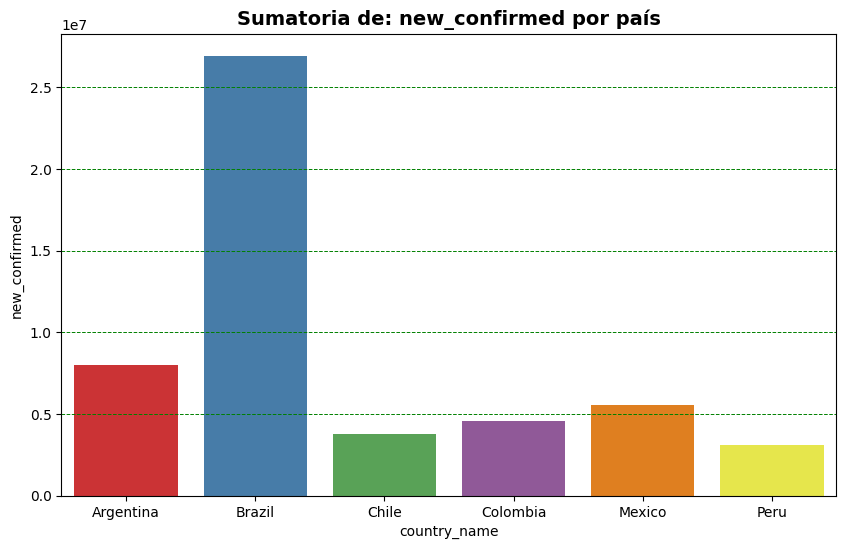

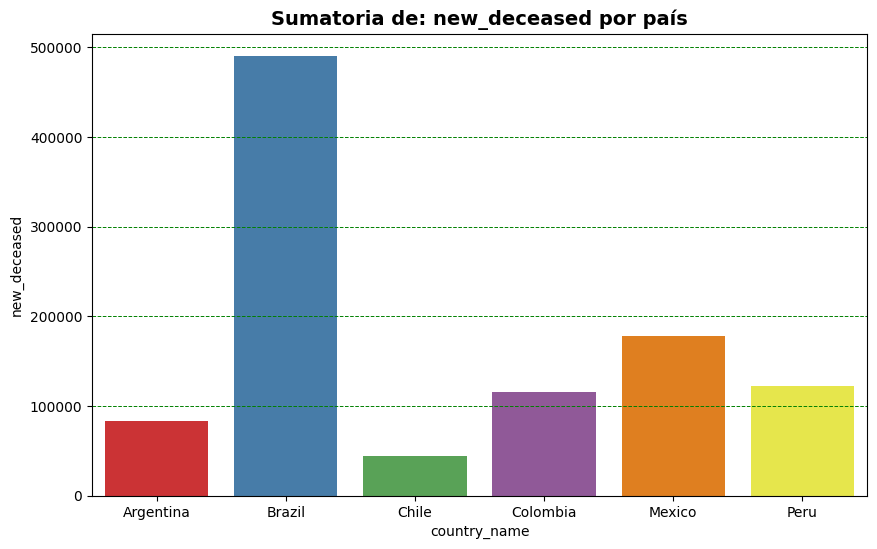

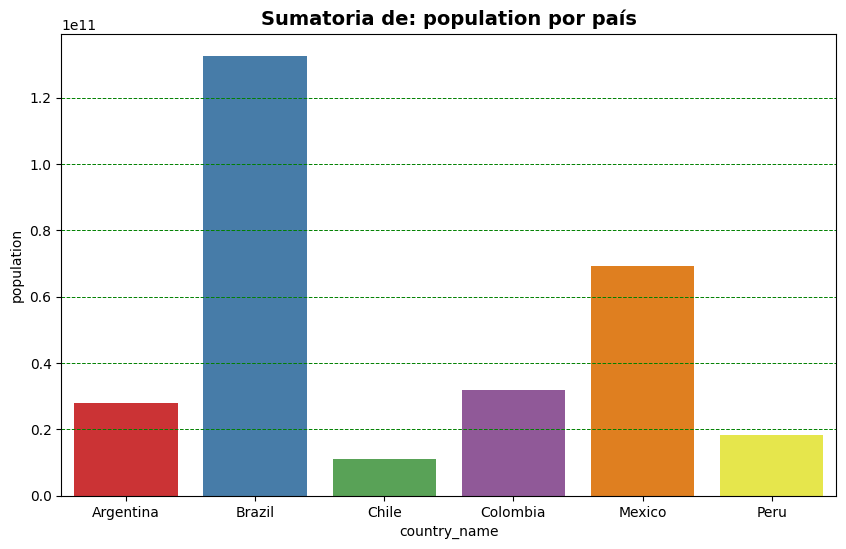

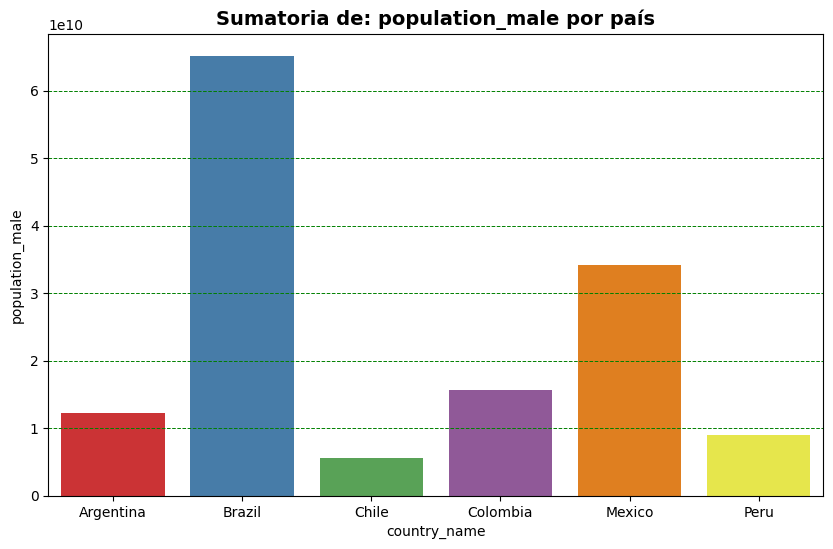

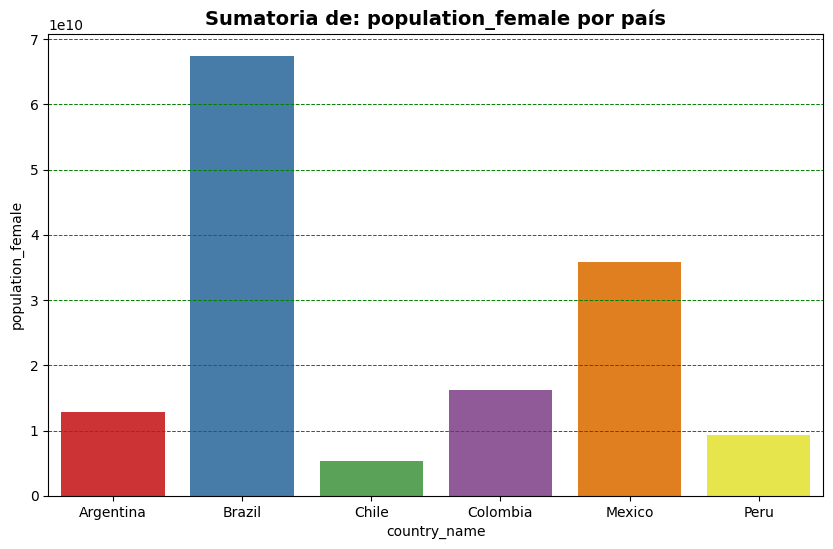

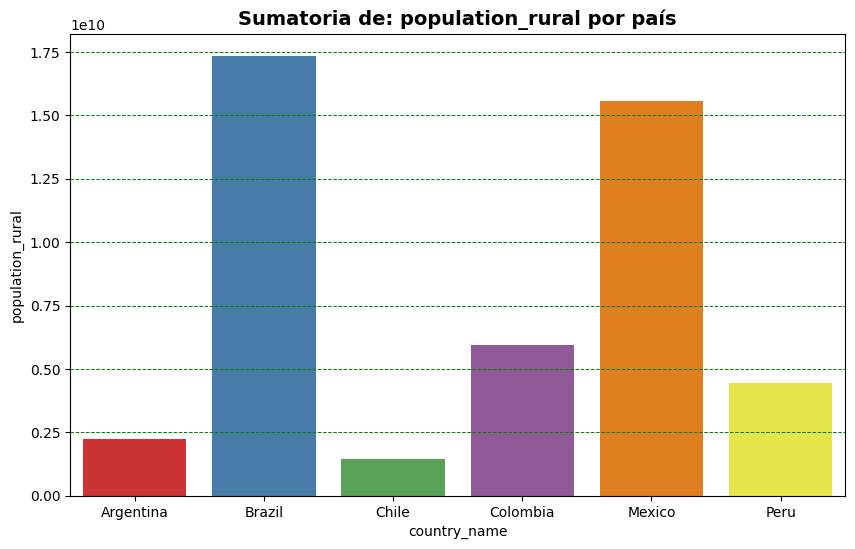

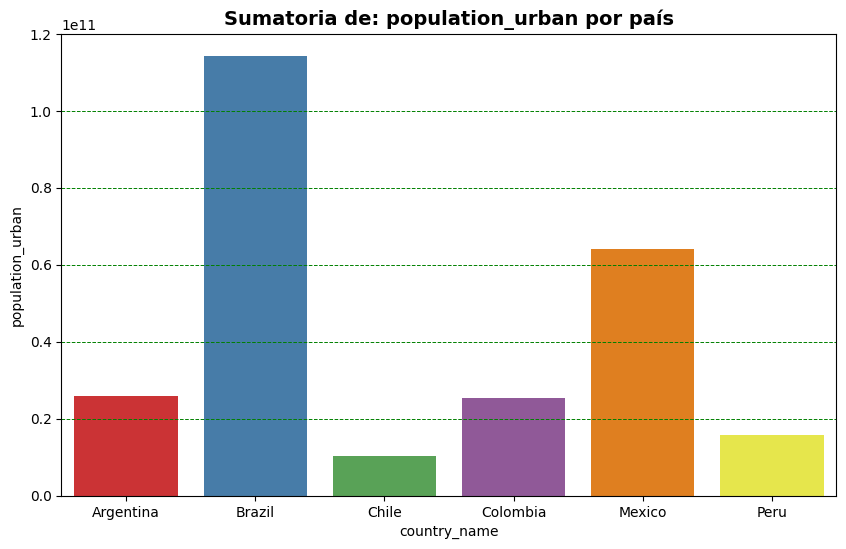

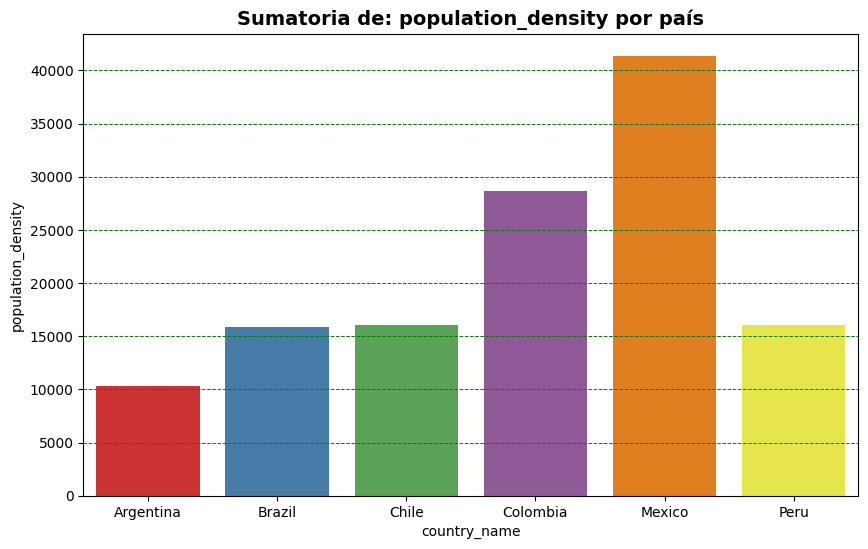

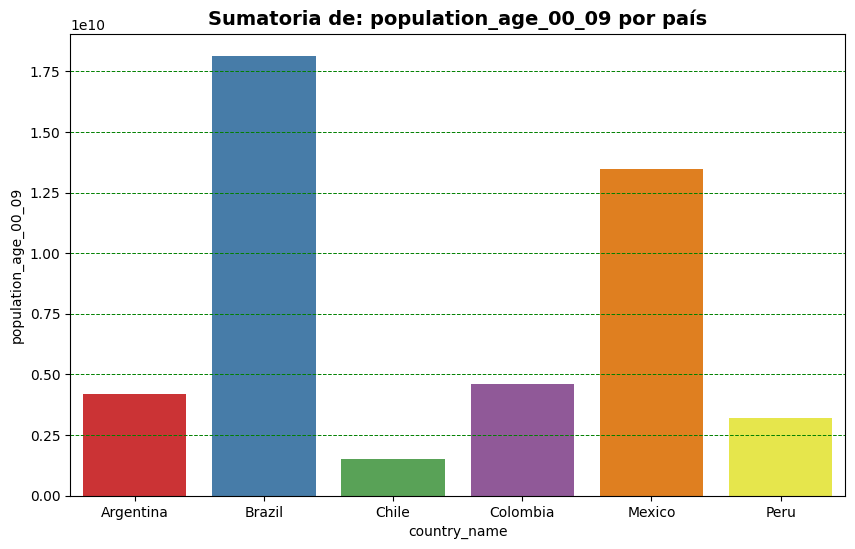

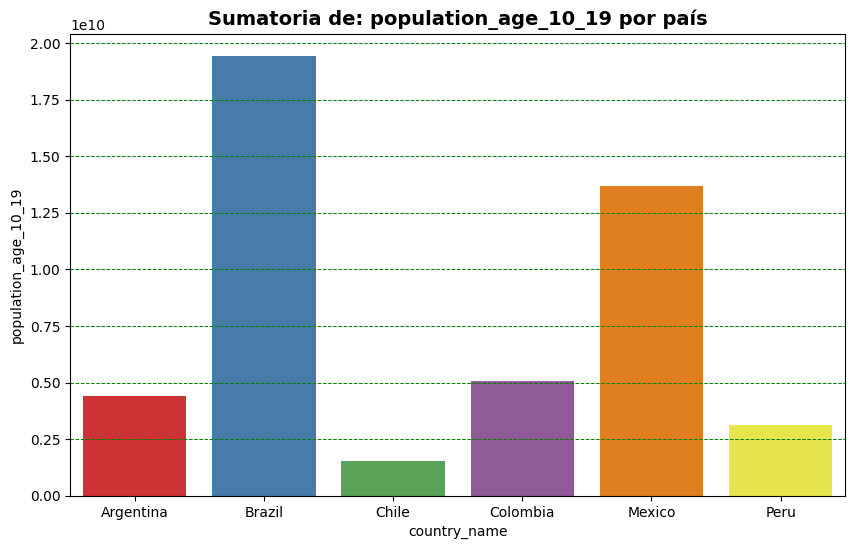

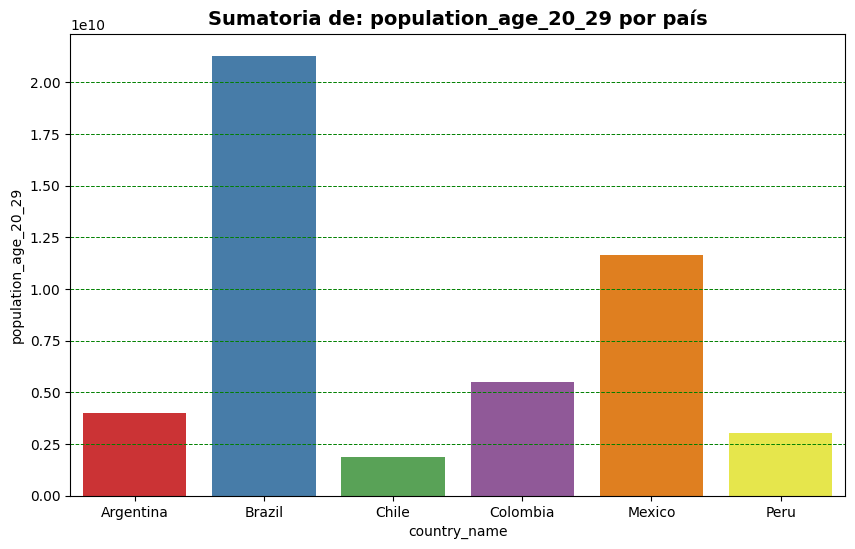

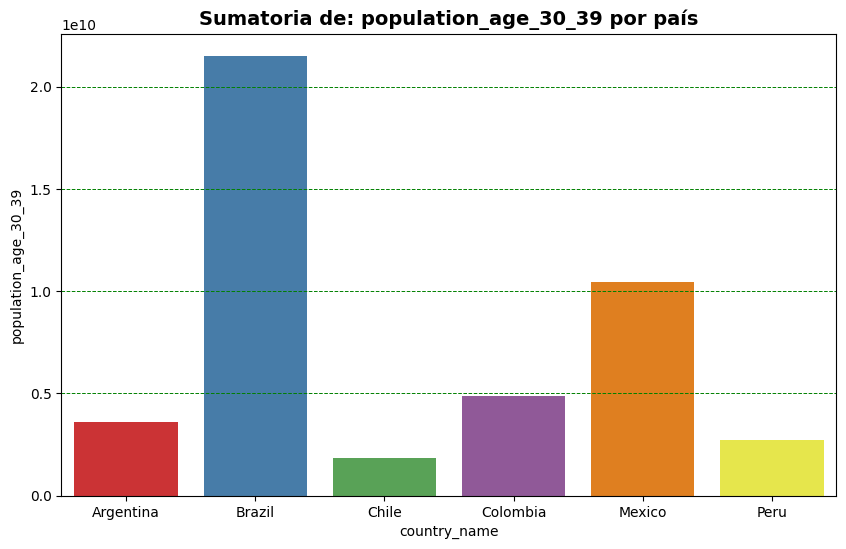

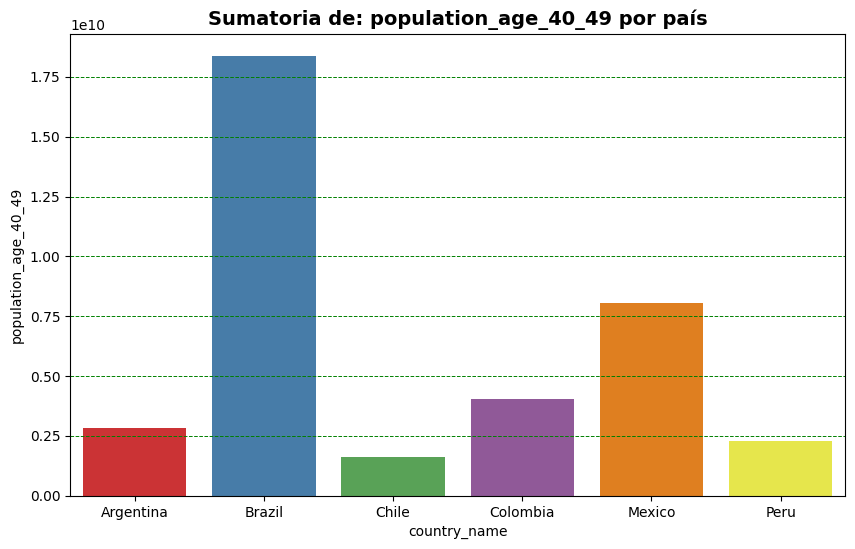

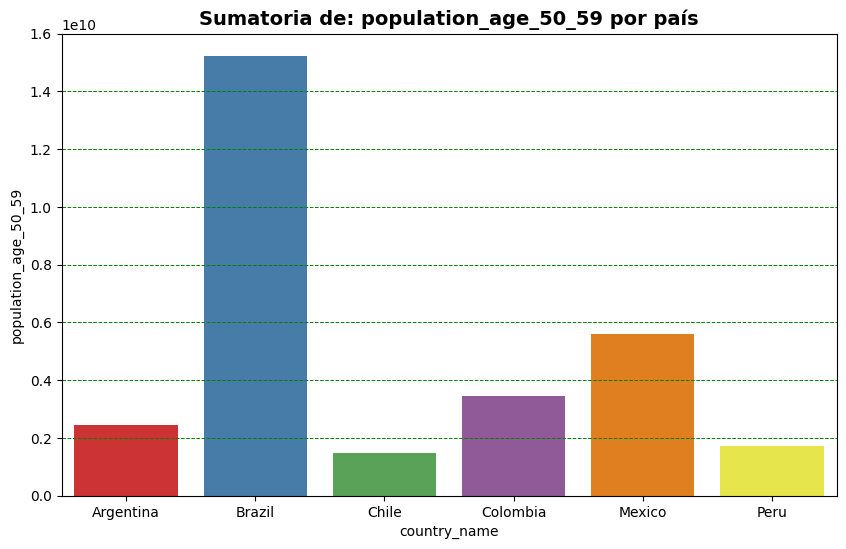

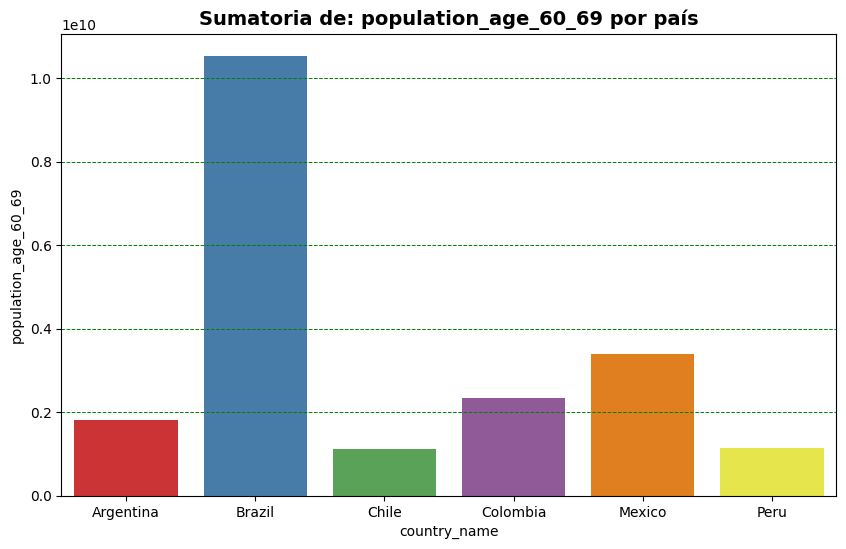

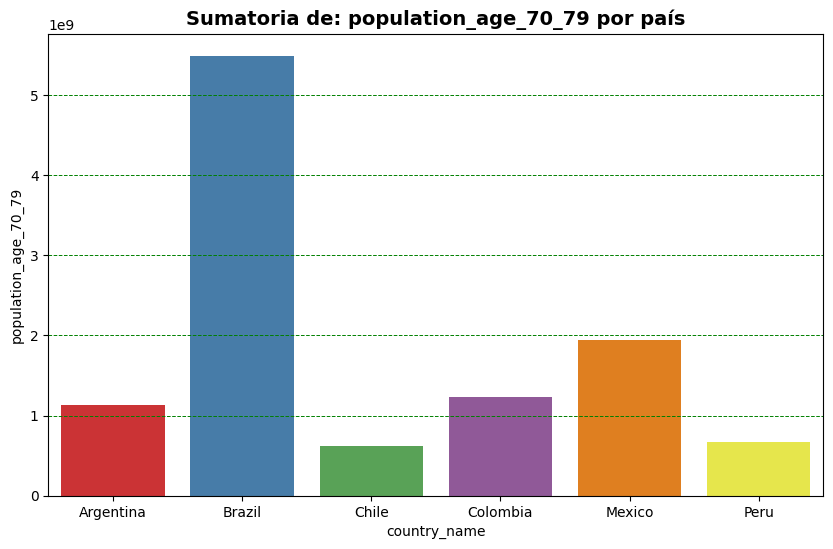

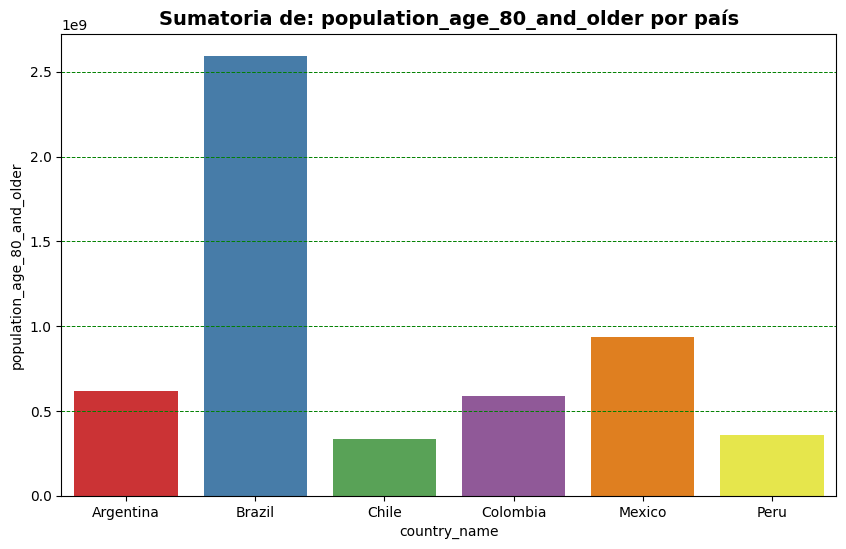

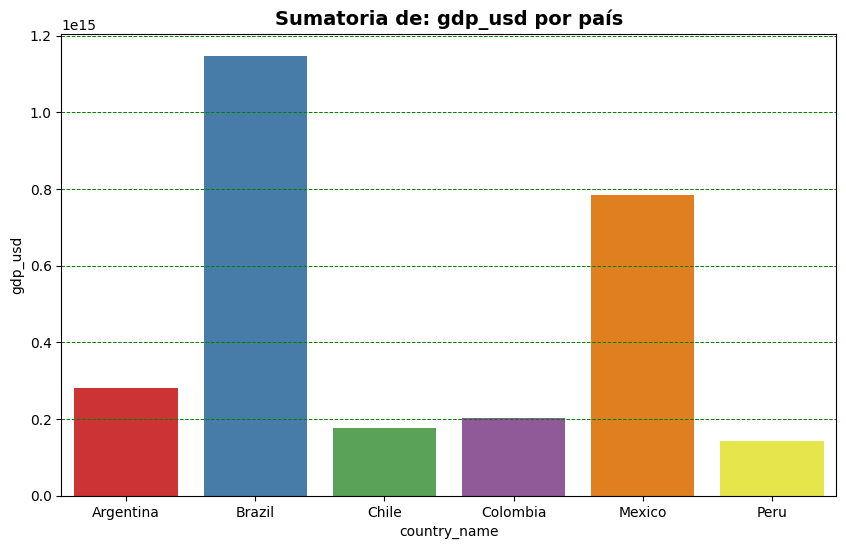

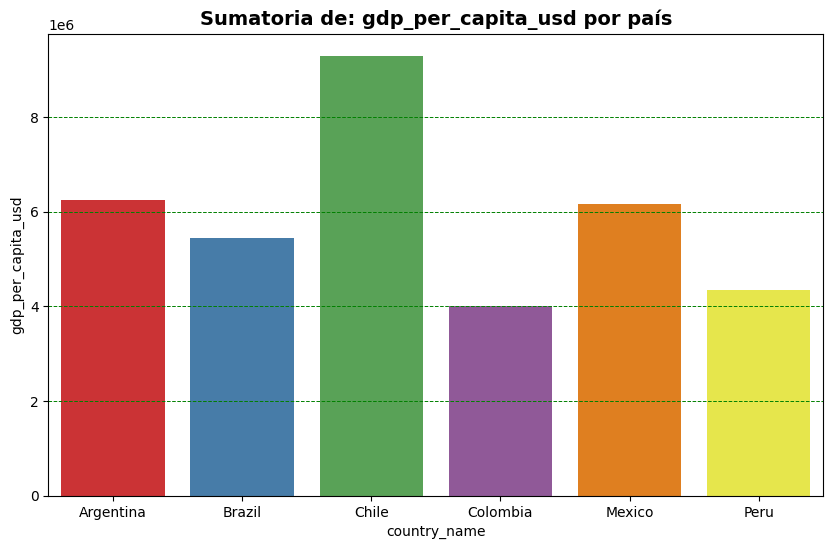

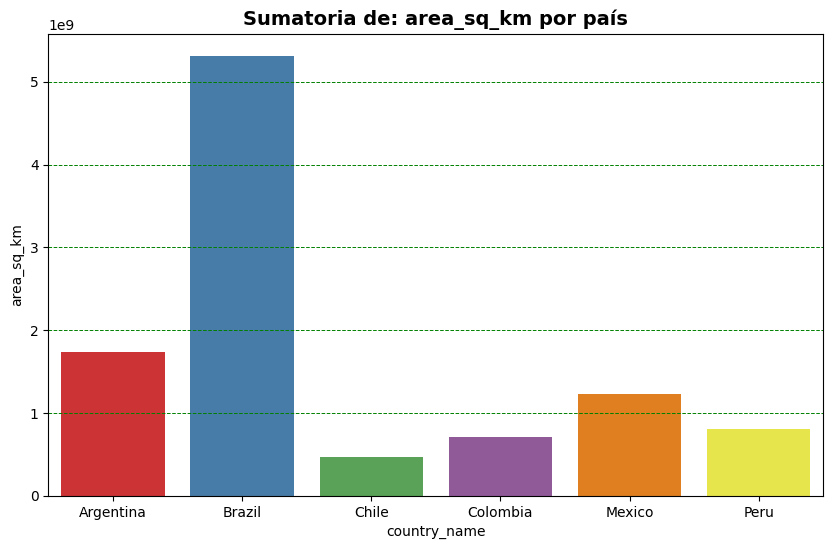

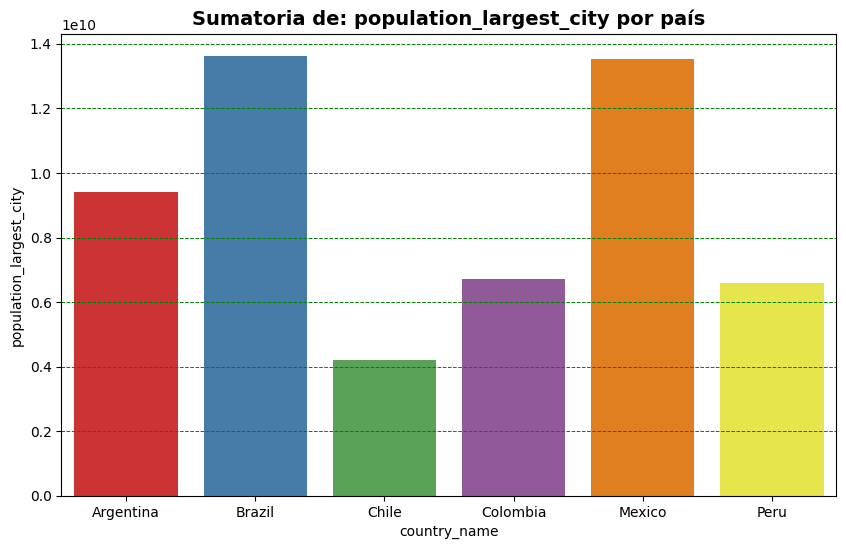

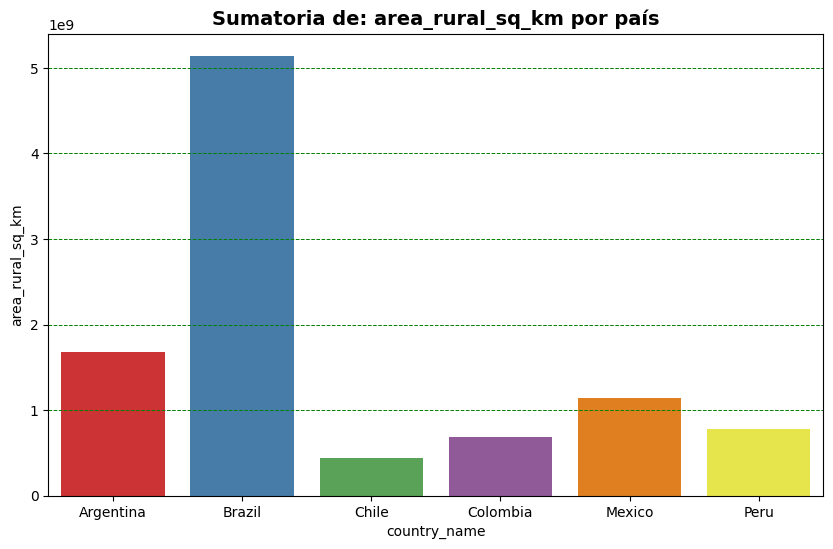

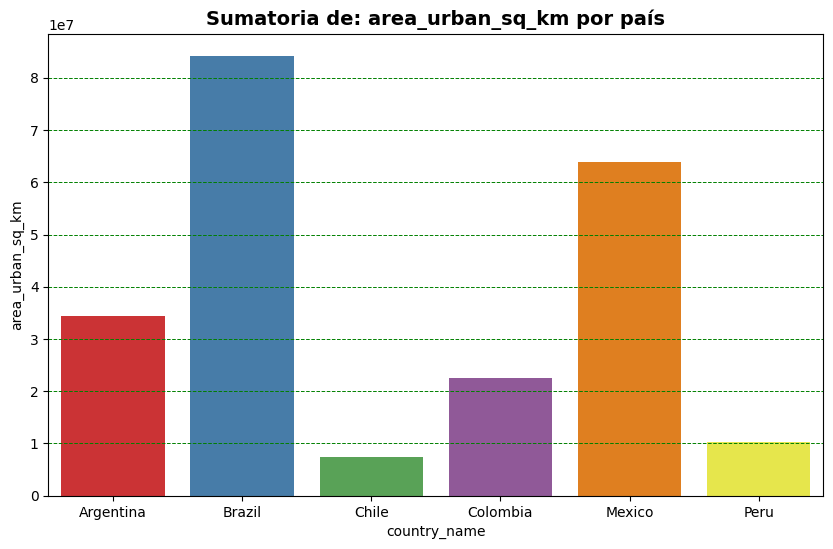

In [17]:
#grafico de barras comparando variables consideradas para el estudio por paises 

#excluimos columnas que no son necesarias para este tipo de grafico 
columnas_excluidas = ['human_development_index', 'vacunacion', 'longitude', 'latitude', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
                      'physicians_per_1000', 'average_temperature_celsius', 'minimum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'life_expectancy', 'comorbidity_mortality_rate',
                       'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered', 'cumulative_vaccine_doses_administered', 'adult_male_mortality_rate', 'adult_female_mortality_rate',
                       'pollution_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'maximum_temperature_celsius', 'new_recovered']

#excluimos las columnas que no son necesarias para este tipo de grafico
columnas_filtradas = [col for col in columnas_numericas if col not in columnas_excluidas]

# Agrupamos los datos por país y sumamos las variables, se utiliza el reset index para que la columna country_name no se convierta en el indice del dataframe y sea una columna normal
df_agrupados = df_datos_filtrados.groupby('country_name')[columnas_filtradas].sum().reset_index()

# generamos un for para recorrer todas las columnas y graficarlas
for columna in columnas_filtradas:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='country_name', y=columna, data=df_agrupados, hue="country_name", palette='Set1')  # Utiliza la paleta de colores personalizada
    plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
    plt.title(f'Sumatoria de: {columna} por país', fontsize=14, fontweight='bold', color='black')  
    plt.show()


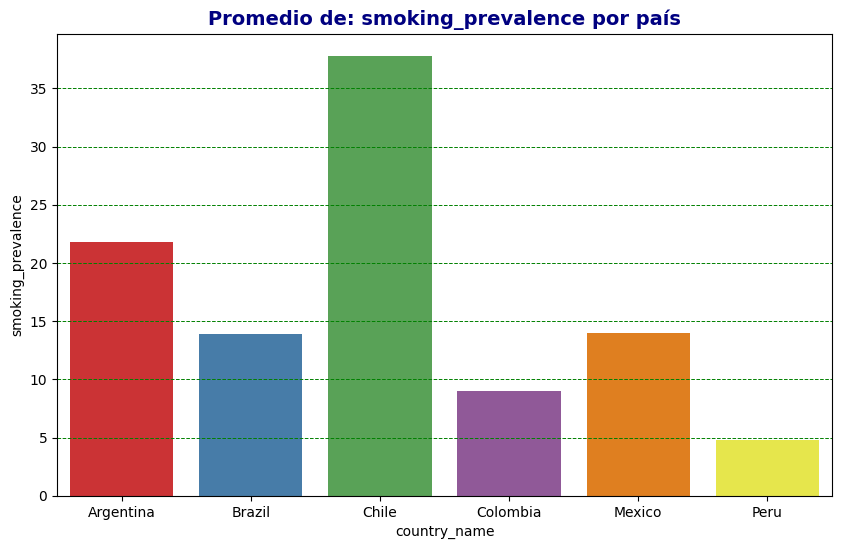

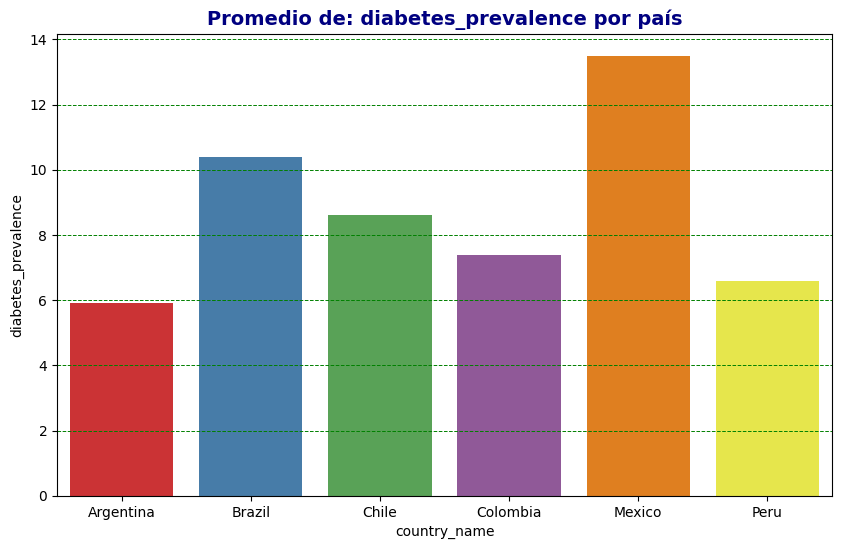

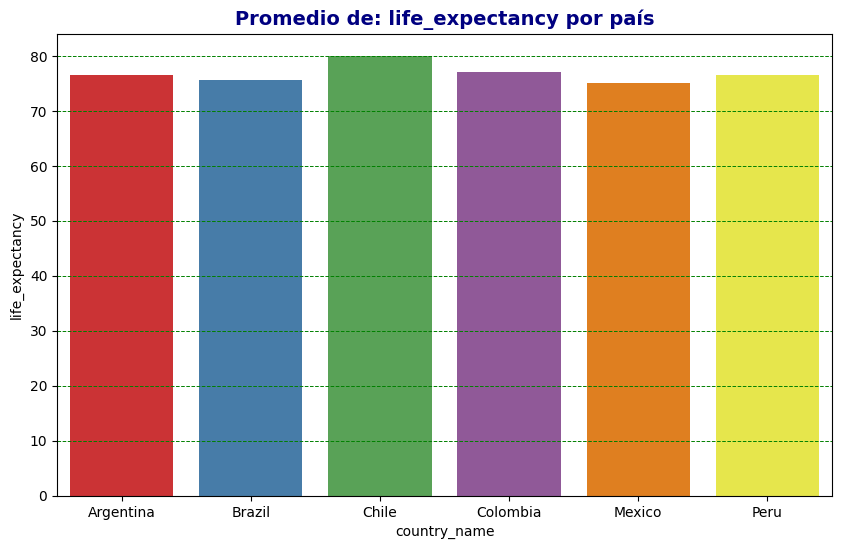

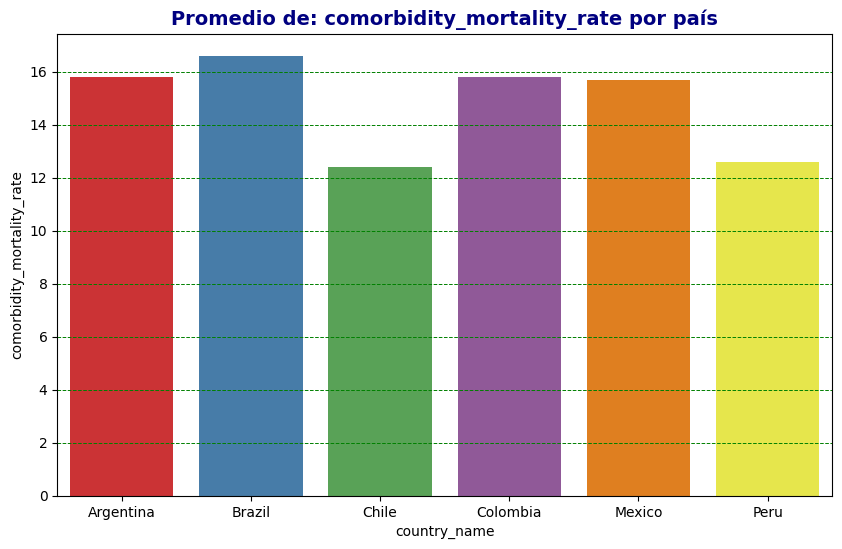

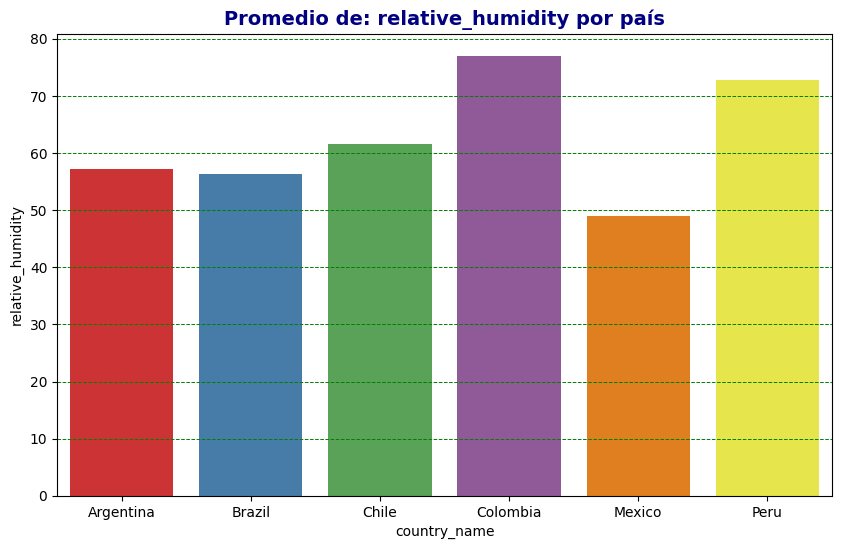

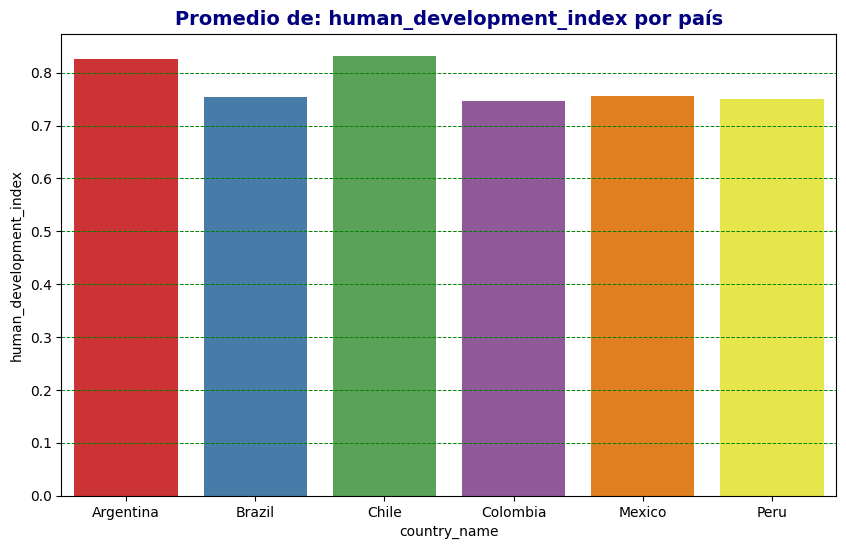

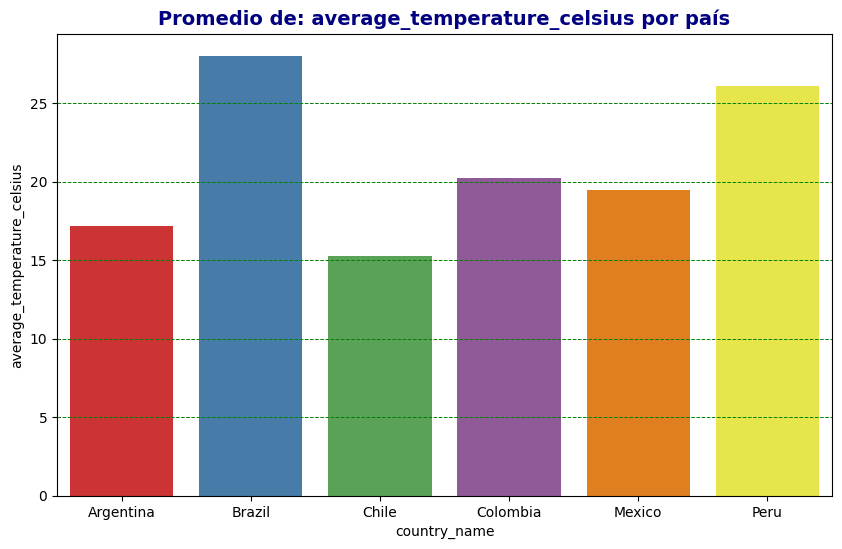

In [18]:
# para los siguientes graficos se tomaran las variables de porcentajes donde se calculara el promedio por cada pais, para que nos muestre graficos coherentes 
columnas_porcentajes = ['smoking_prevalence', 'diabetes_prevalence', 'life_expectancy', 'comorbidity_mortality_rate', 'relative_humidity', 'human_development_index', 
                        'average_temperature_celsius',
                        ]

# Agrupamos los datos por país y realizamos un promedio de las variables, se utiliza el reset index para que la columna country_name no se convierta en el indice del dataframe 
# y sea una columna normal
df_agrupados = df_datos_filtrados.groupby('country_name')[columnas_porcentajes].mean().reset_index()

# hacemos un for para recorre todas las columnas y graficarlas
for columna in columnas_porcentajes:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='country_name', y=columna, data=df_agrupados, hue="country_name", palette='Set1')
    plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
    plt.title(f'Promedio de: {columna} por país', fontsize=14, fontweight='bold', color='navy')  
    plt.show()
 

In [19]:
# aqui calculamos la poblacion total de cada pais y reiniciamos la variable para generar el calculo para cada pais
poblacion_total= df_datos_filtrados.groupby('country_name')['population'].sum().reset_index()


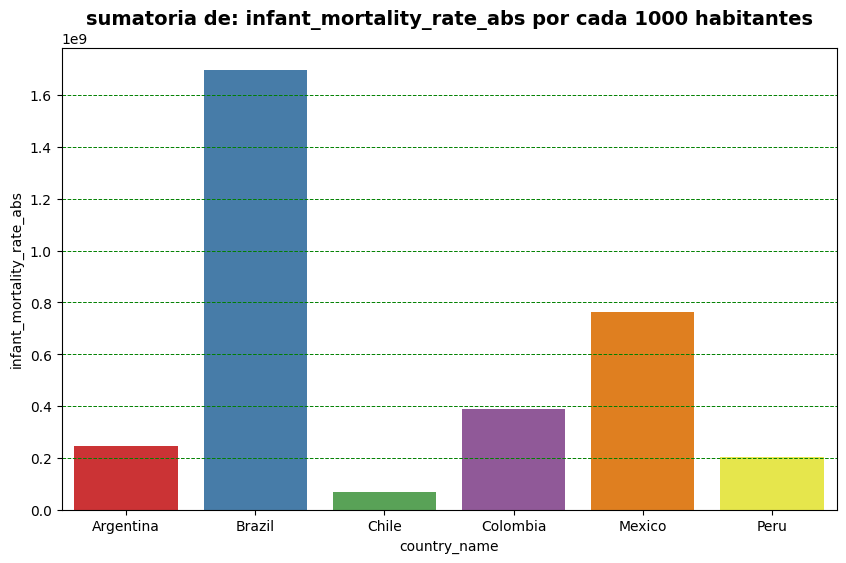

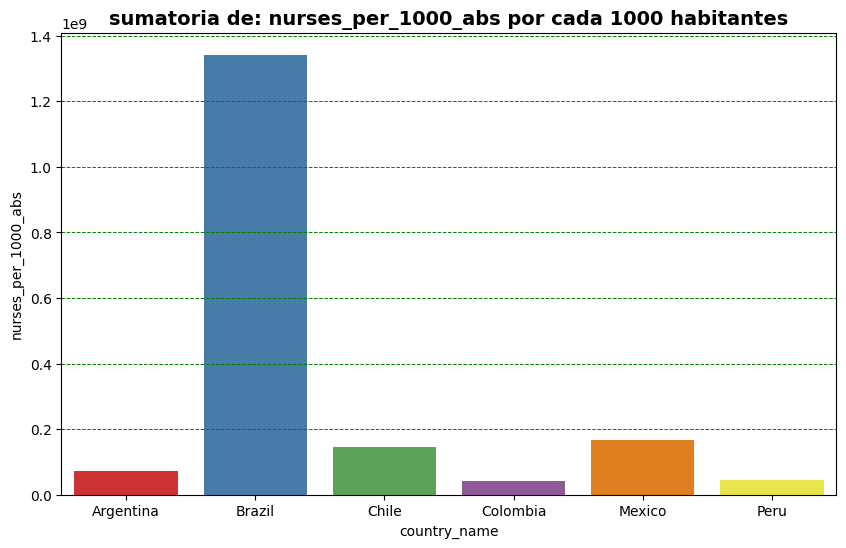

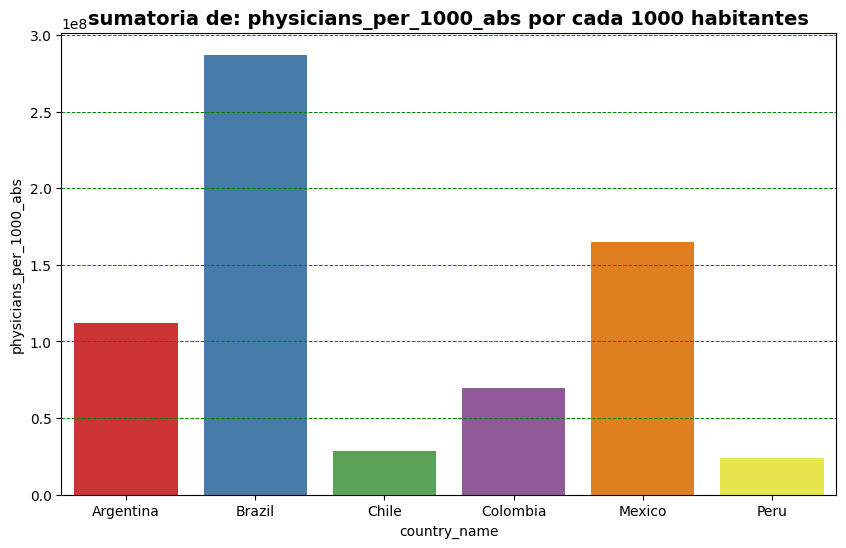

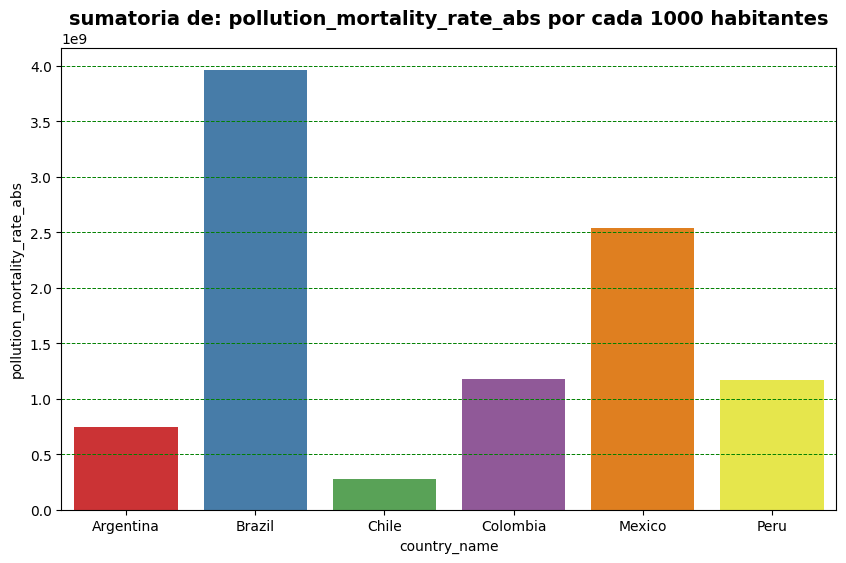

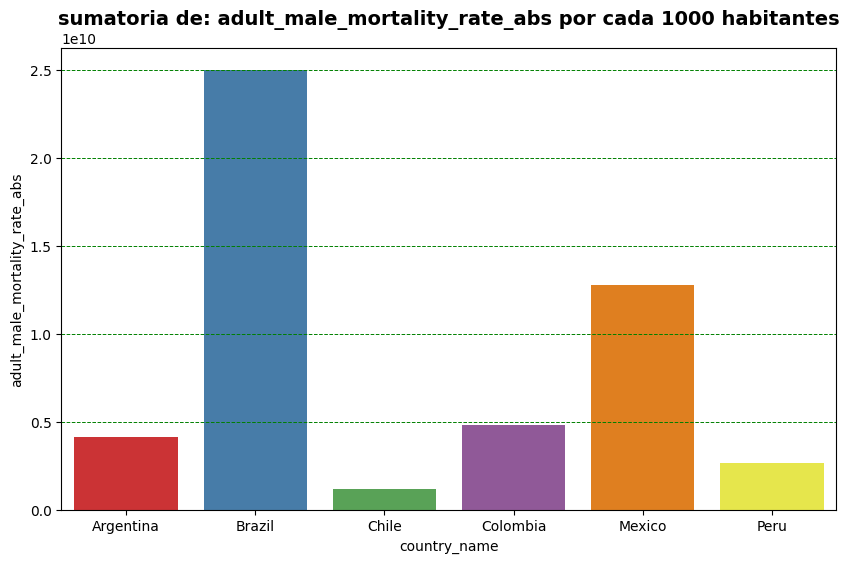

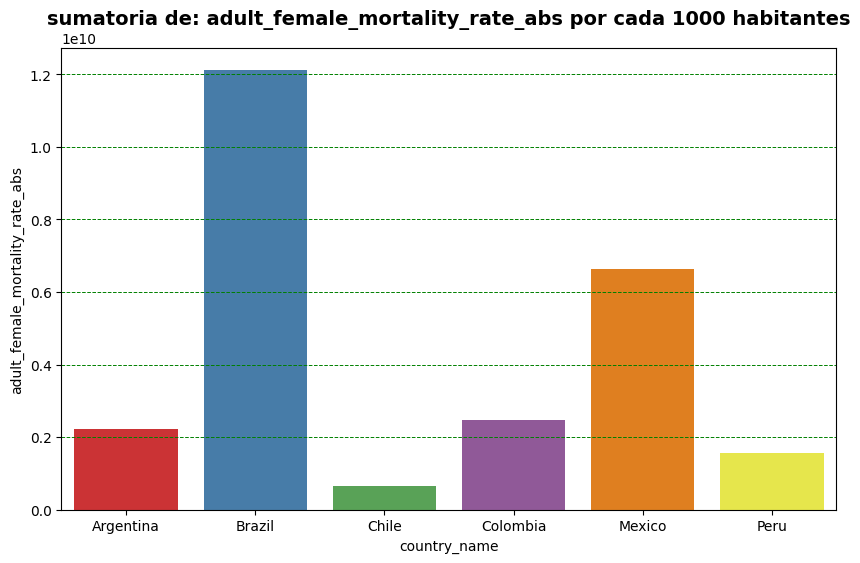

In [20]:
# con estas variables hacemos un calculo diferente ya que es una muestra por cada 1000 habitantes
columnas_muestra =['infant_mortality_rate', 'nurses_per_1000', 'physicians_per_1000', 'pollution_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate'] 



# Creamos las columnas absolutas
for col in columnas_muestra:
    df_datos_filtrados[f'{col}_abs'] = (df_datos_filtrados[col] * df_datos_filtrados['population']) / 1000

# Lista de las nuevas columnas absolutas
columnas_abs = [f'{col}_abs' for col in columnas_muestra]

# Agrupamos los valores por país
df_agrupados = df_datos_filtrados.groupby('country_name')[columnas_abs].sum().reset_index()

# hacemos un for para recorre todas las columnas y graficarlas
for columna in columnas_abs:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='country_name', y=columna, data=df_agrupados, hue="country_name", palette='Set1')
    plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
    plt.title(f'sumatoria de: {columna} por cada 1000 habitantes', fontsize=14, fontweight='bold', color='black')  
    plt.show()


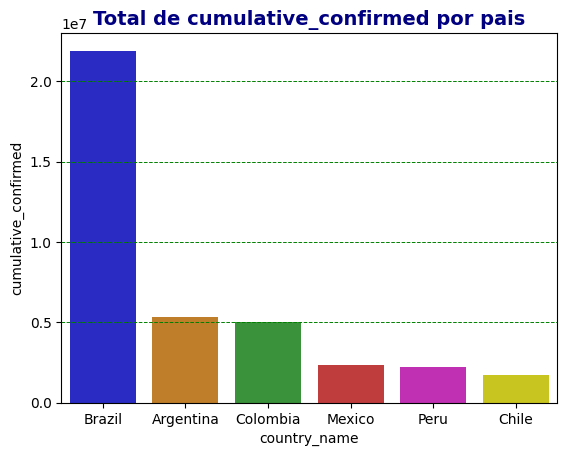

In [21]:
# para el grafico de total de casos confirmados como la columna es un acumulado no podemos sumar toda la columna por pais porque no tiene sentido, para esta ocasion buscamos el ultimo valor
# de la columna por pais 

colores=["#0f12db", "#d88110", '#2ca02c', '#d62728', "#d61ac6fd", "#e4e004"]  # Colores personalizados para la paleta de colores y poderlos diferenciar facilmente
df_fechas=df_datos_filtrados.sort_values("date")  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
ultimo_valor=df_fechas.groupby('country_name').tail(1)  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
resultado = ultimo_valor[["country_name", "cumulative_confirmed"]]
resultado = resultado.sort_values("cumulative_confirmed", ascending=False)
sns.barplot(x='country_name', y='cumulative_confirmed', data=resultado, hue="country_name", palette=colores)
plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
plt.title(f'Total de cumulative_confirmed por pais', fontsize=14, fontweight='bold', color='navy')
plt.show()

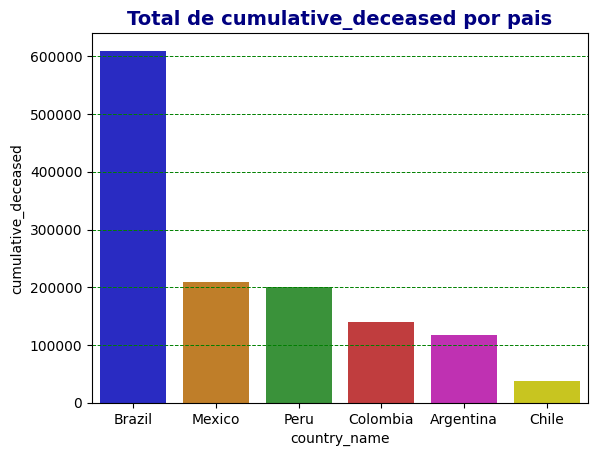

In [22]:
# para el grafico de total de casos fallecidos como la columna es un acumulado no podemos sumar toda la columna por pais porque no tiene sentido, para esta ocasion buscamos el ultimo valor
# de la columna por pais 

colores=["#0f12db", "#d88110", '#2ca02c', '#d62728', "#d61ac6fd", "#e4e004"]  # Colores personalizados para la paleta de colores y poderlos diferenciar facilmente
df_fechas=df_datos_filtrados.sort_values("date")  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
ultimo_valor=df_fechas.groupby('country_name').tail(1)  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
resultado = ultimo_valor[["country_name", "cumulative_deceased"]]
resultado = resultado.sort_values("cumulative_deceased", ascending=False)
sns.barplot(x='country_name', y='cumulative_deceased', data=resultado, hue="country_name", palette=colores)
plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
plt.title(f'Total de cumulative_deceased por pais', fontsize=14, fontweight='bold', color='navy')
plt.show()

In [23]:
total_confirmados=df_datos_filtrados.groupby("country_name")['new_deceased'].sum().reset_index()
print(total_confirmados)

  country_name  new_deceased
0    Argentina         83563
1       Brazil        490570
2        Chile         44294
3     Colombia        115128
4       Mexico        177997
5         Peru        122485


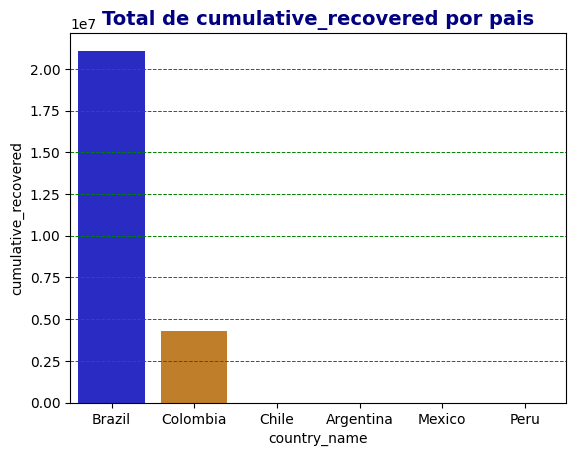

In [24]:
# para el grafico de total de casos recuperados como la columna es un acumulado no podemos sumar toda la columna por pais porque no tiene sentido, para esta ocasion buscamos el ultimo valor
# de la columna por pais 

colores=["#0f12db", "#d88110", '#2ca02c', '#d62728', "#d61ac6fd", "#e4e004"]  # Colores personalizados para la paleta de colores y poderlos diferenciar facilmente
df_fechas=df_datos_filtrados.sort_values("date")  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
ultimo_valor=df_fechas.groupby('country_name').tail(1)  #ordenamos la columna de menor a mayor y tomamos en cuenta el ultimo valor con el metodo tail
resultado = ultimo_valor[["country_name", "cumulative_recovered"]]
resultado = resultado.sort_values("cumulative_recovered", ascending=False)
sns.barplot(x='country_name', y='cumulative_recovered', data=resultado, hue="country_name", palette=colores)
plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
plt.title(f'Total de cumulative_recovered por pais', fontsize=14, fontweight='bold', color='navy')
plt.show()

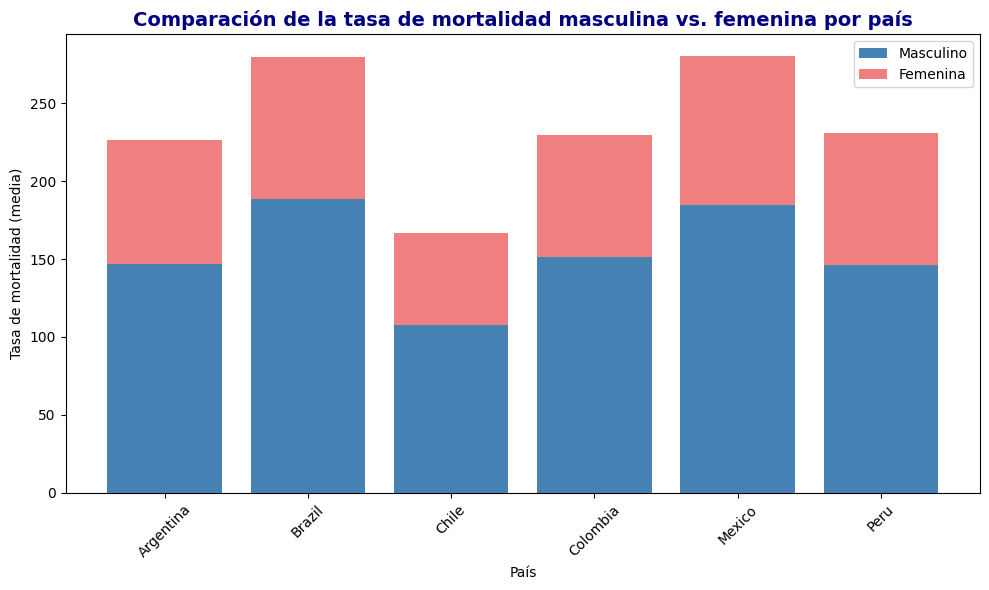

In [25]:
#Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs femenina por país.

# Agrupamos por país y calculamos la media de las tasas de mortalidad masculina y femenina
mortalidad = df_datos_filtrados.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean().reset_index()

# Gráfico de barras apilado
plt.figure(figsize=(10,6))
plt.bar(mortalidad['country_name'], mortalidad['adult_male_mortality_rate'], label='Masculino', color='steelblue')
plt.bar(mortalidad['country_name'], mortalidad['adult_female_mortality_rate'], 
        bottom=mortalidad['adult_male_mortality_rate'], label='Femenina', color='lightcoral')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('País')
plt.ylabel('Tasa de mortalidad (media)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

>A partir de ahora se mostraran los graficos de histogramas 

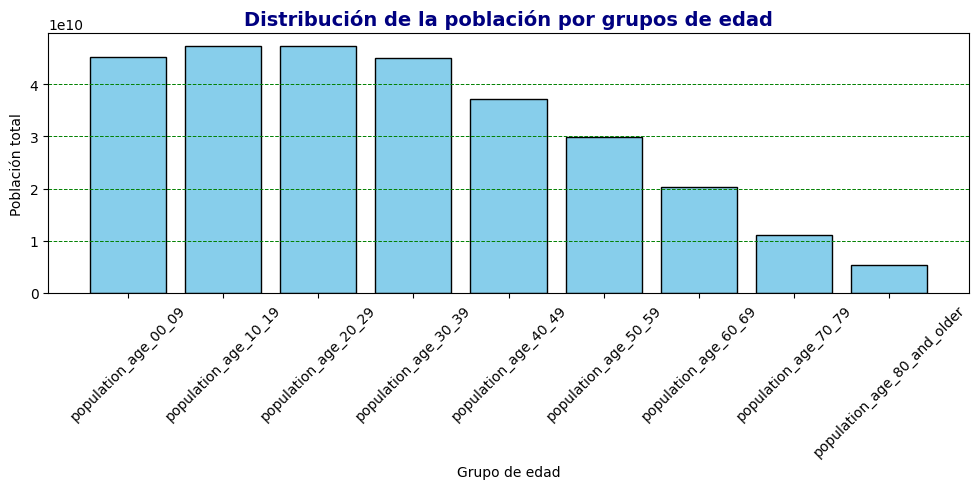

In [26]:
#Distribución de la población por grupos de edad.
 
#generamos una lista  con los grupos de edad desde los 0 años hasta los 80 años y mas
grupos_edad = [
    'population_age_00_09',
    'population_age_10_19',
    'population_age_20_29',
    'population_age_30_39',
    'population_age_40_49',
    'population_age_50_59',
    'population_age_60_69',
    'population_age_70_79',
    'population_age_80_and_older'
]

#sumamos la población por cada grupo de edad
poblacion_por_edad = df_datos_filtrados[grupos_edad].sum()

plt.figure(figsize=(10, 5))

#generamos el histograma de barras donde colocamos un color azul cielo y un borde negro para diferecniar cada barra
plt.bar(grupos_edad, poblacion_por_edad, color='skyblue', edgecolor='black')
plt.title('Distribución de la población por grupos de edad', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Grupo de edad')
plt.ylabel('Población total')
plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

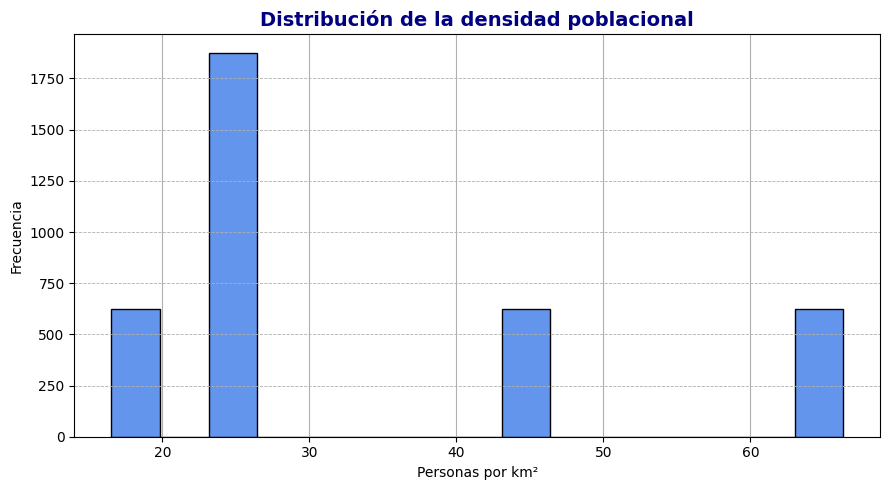

In [27]:
#Distribución de la densidad poblacional.
plt.figure(figsize=(9, 5))

#generamos un histograma de la frecuencia de la densidad poblacional de manera general donde se divide el rango de valores en 15 intervalos 
df_datos_filtrados['population_density'].hist(bins=15, color='cornflowerblue', edgecolor='black')

plt.title('Distribución de la densidad poblacional', fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Personas por km²')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.6, axis='y') #Activamos lineas horizontales para una mejor visualización
plt.tight_layout()
plt.show()


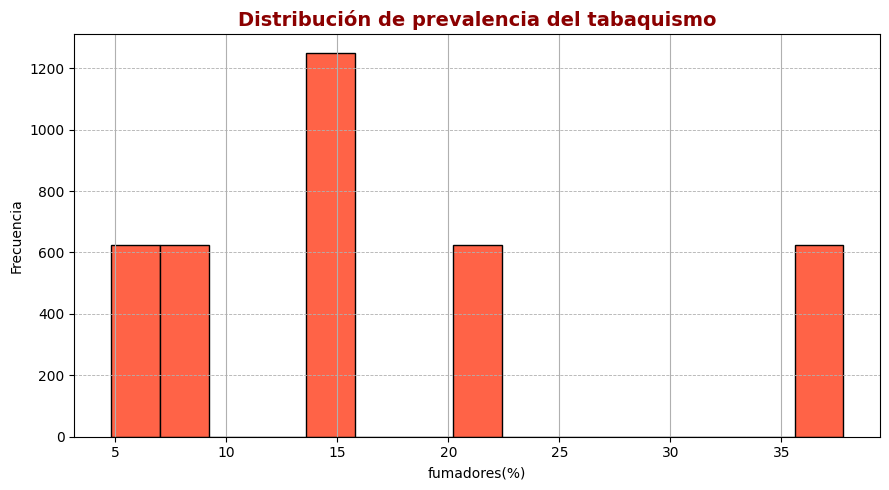

In [28]:
#distribucion de smoking_prevalence a nivel global

plt.figure(figsize=(9, 5))

#generamos un histograma para saber que porcentaje de fumadores hay con mas frecuencia a nivel general
df_datos_filtrados['smoking_prevalence'].hist(bins=15, color='tomato', edgecolor='black')

plt.title('Distribución de prevalencia del tabaquismo', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('fumadores(%)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')
plt.tight_layout()
plt.show()



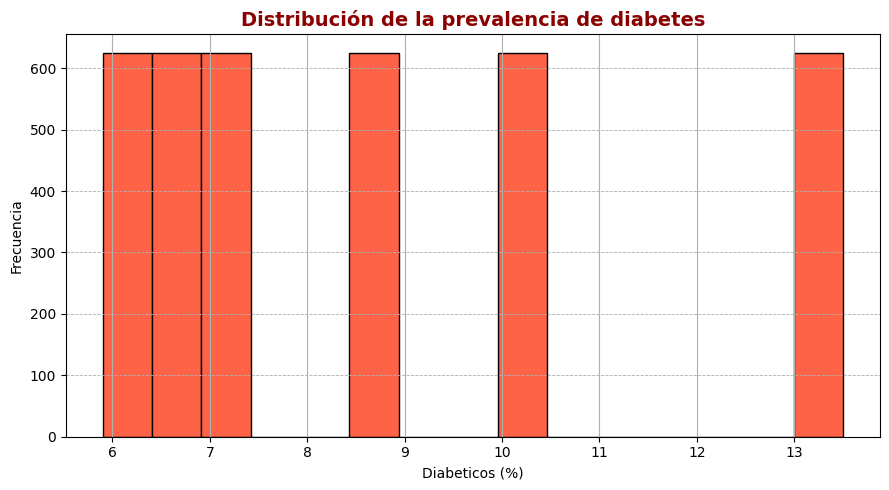

In [29]:
# Distrbución de diabetes_prevalence a nivel global

plt.figure(figsize=(9, 5))

#generamos un histograma para saber que porcentaje de diabeticos hay con mas frecuencia a nivel general
df_datos_filtrados['diabetes_prevalence'].hist(bins=15, color='tomato', edgecolor='black')

plt.title('Distribución de la prevalencia de diabetes', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('Diabeticos (%)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')
plt.tight_layout()
plt.show()


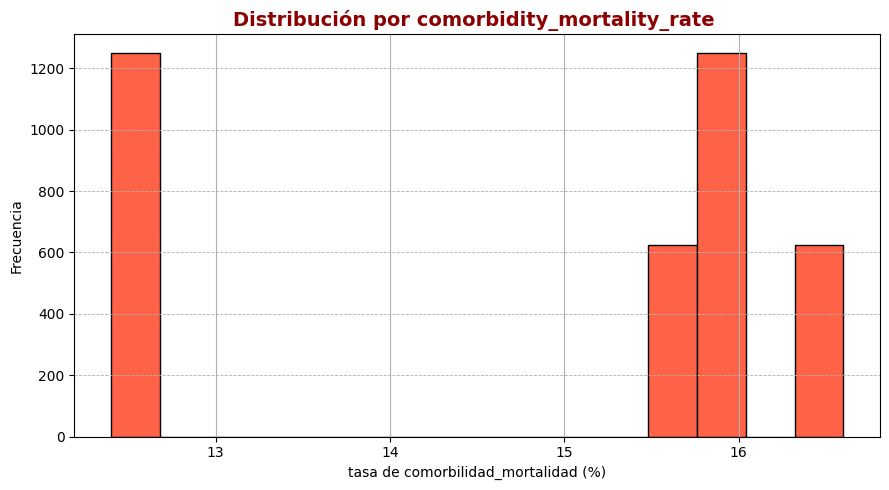

In [30]:
# distribucion de comorbidity_mortality_rate a nivel global

plt.figure(figsize=(9, 5))

#generamos un histograma para saber que porcentaje de personas con enfermedades cardiovasculares, cancer, diabetes o respiratorias hay con mas frecuencia a nivel general
df_datos_filtrados['comorbidity_mortality_rate'].hist(bins=15, color='tomato', edgecolor='black')

plt.title('Distribución por comorbidity_mortality_rate ', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('tasa de comorbilidad_mortalidad (%)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.6, axis='y')
plt.tight_layout()
plt.show()



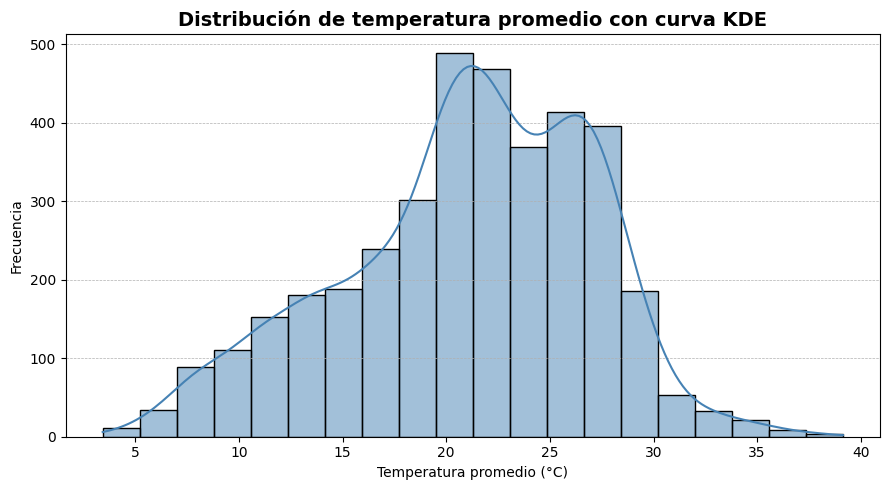

In [31]:
# Distribucion de la temperatura promedio a nivel global

plt.figure(figsize=(9, 5))

#generamos un histograma con la libreria seaborn para ver la distribucion de la temperatura promedio a nivel global con una linea de densidad KDE (Kernel Density Estimate) que es una 
#linea continua y sirve para suavizar los datos y ver la tendencia general de la distribucion
sns.histplot(data=df_datos_filtrados, x='average_temperature_celsius', bins=20, kde=True, color='steelblue')
plt.title('Distribución de temperatura promedio con curva KDE', fontsize=14, fontweight='bold')
plt.xlabel('Temperatura promedio (°C)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()


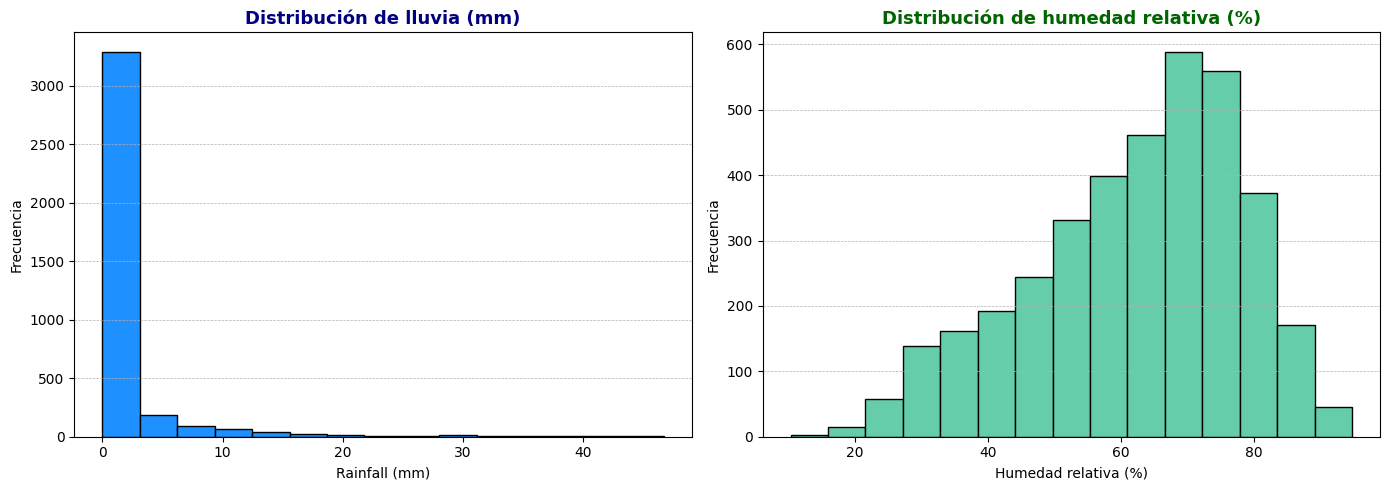

In [32]:
# Distribucion de relative_humidity y rainfall a nivel global

# En esta ocacion generamos dos subgraficos porque son columnas que se supone que estan estrechamente relacionadas 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Rainfall
axes[0].hist(df_datos_filtrados['rainfall_mm'], bins=15, color='dodgerblue', edgecolor='black')
axes[0].set_title('Distribución de lluvia (mm)', fontsize=13, fontweight='bold', color='navy')
axes[0].set_xlabel('Rainfall (mm)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, linestyle='--', linewidth=0.5, axis='y')

# Histograma de Relative Humidity
axes[1].hist(df_datos_filtrados['relative_humidity'], bins=15, color='mediumaquamarine', edgecolor='black')
axes[1].set_title('Distribución de humedad relativa (%)', fontsize=13, fontweight='bold', color='darkgreen')
axes[1].set_xlabel('Humedad relativa (%)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, linestyle='--', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()


>A partir de ahora se mostraran los graficos de mapas de calor 

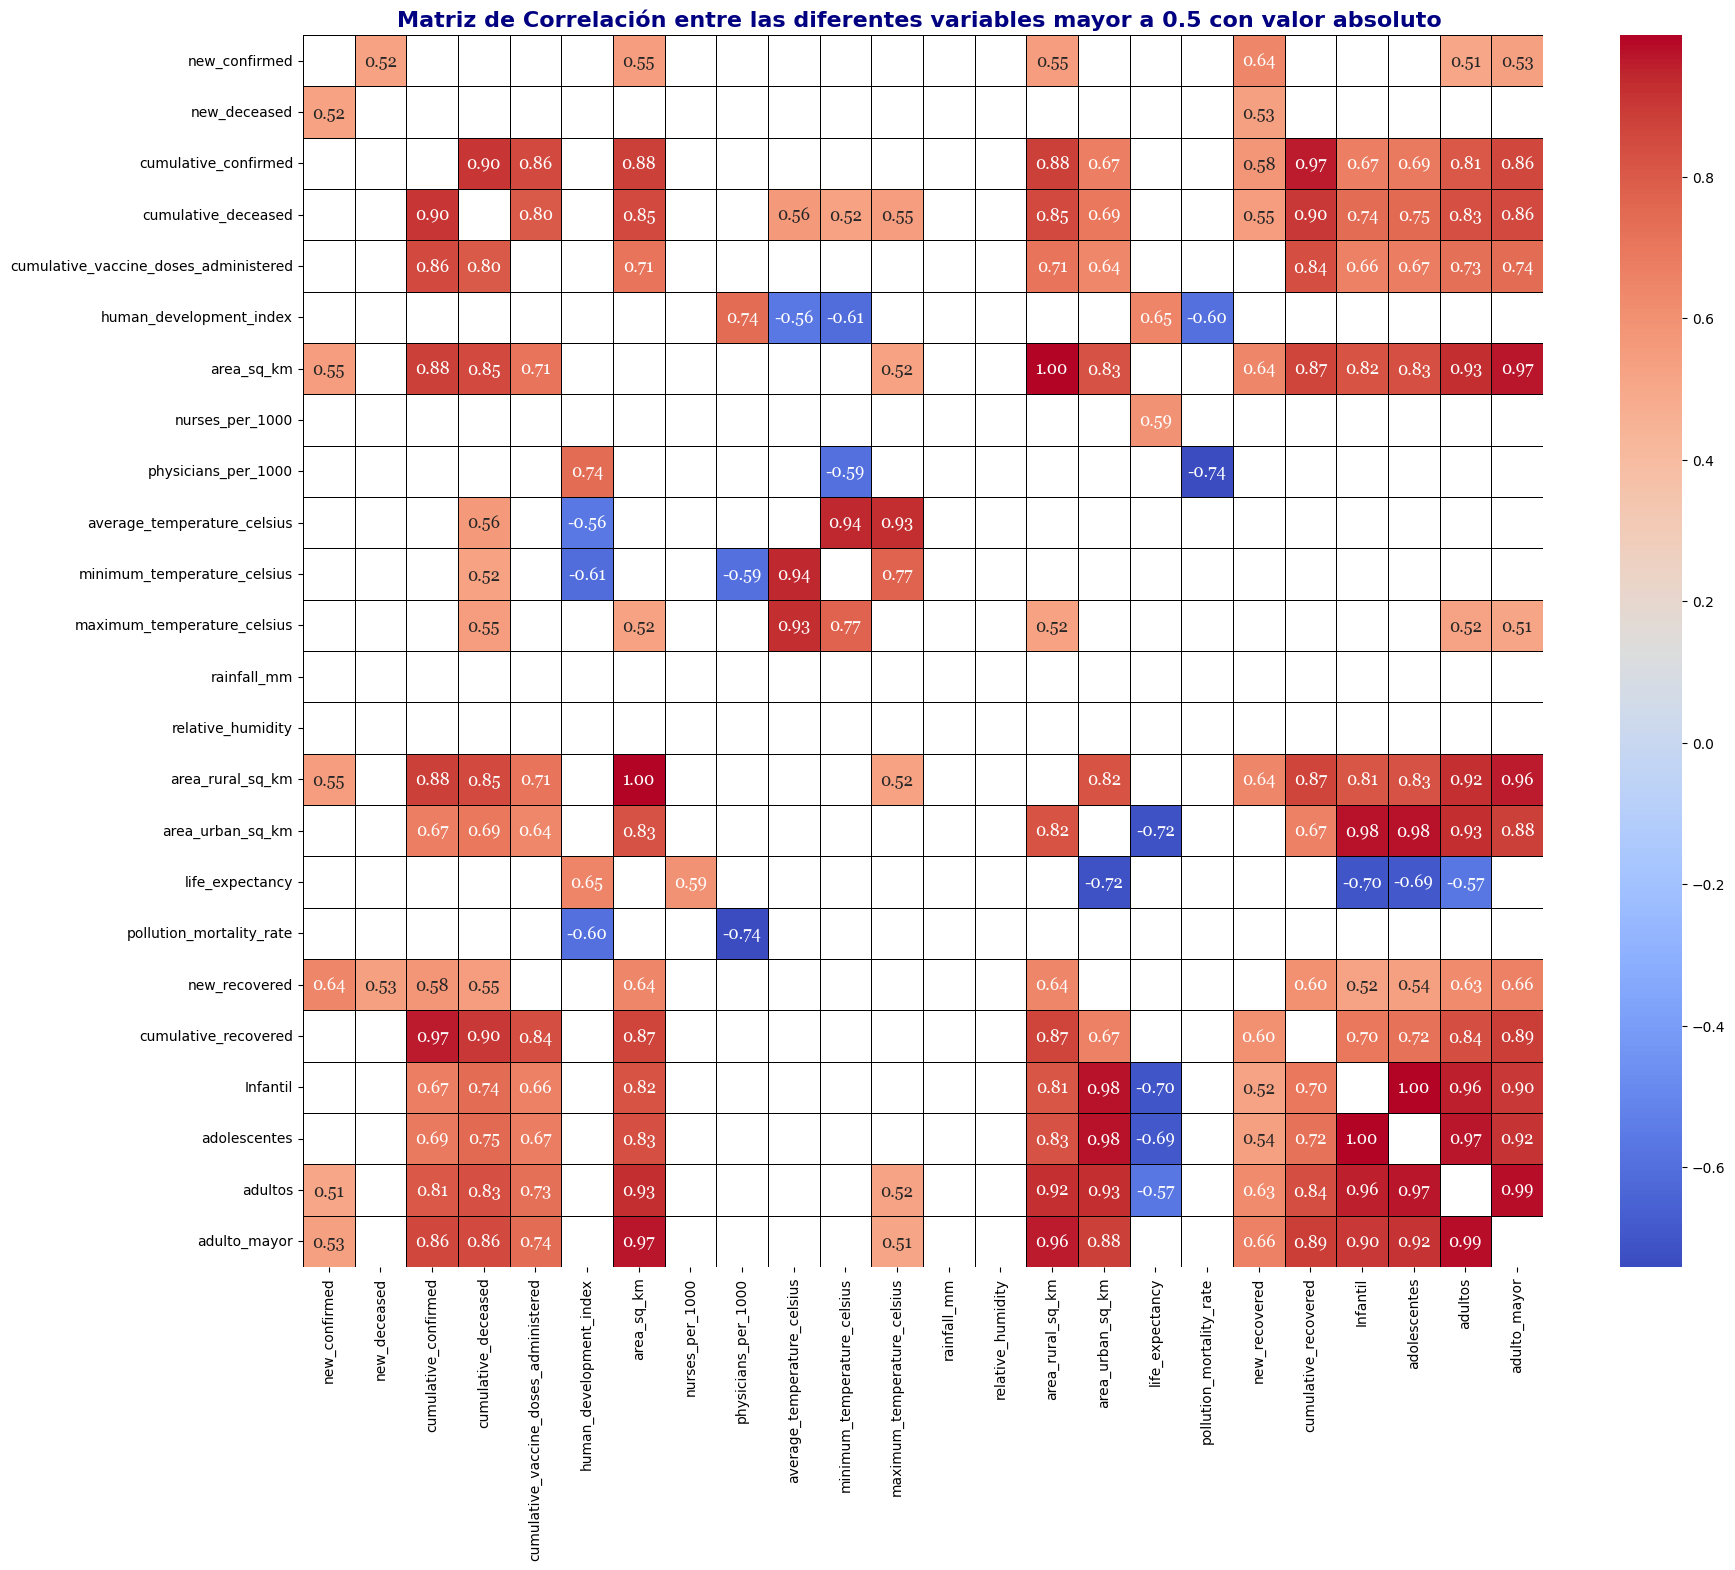

In [33]:
#creamos una matriz de correlacion y se filtran los valores mayores a 0.5 para saber que variables estan correlacionadas entre si tanto positiva como negativamente

#primero agrupamos las variables de poblaciones por categorias para que no tengas tantas filas y columnas y poder visualizar mejor el grafico
# En esta ocación reducimos 9 columnas a tan solo 4 para poder visualizar mejor el grafico
df_datos_filtrados["Infantil"] = df_datos_filtrados['population_age_00_09']
df_datos_filtrados['adolescentes'] = df_datos_filtrados['population_age_10_19']

df_datos_filtrados['adultos'] = (
    df_datos_filtrados['population_age_20_29'] +
    df_datos_filtrados['population_age_30_39'] +
    df_datos_filtrados['population_age_40_49'] +
    df_datos_filtrados['population_age_50_59']
)

df_datos_filtrados['adulto_mayor'] = (
    df_datos_filtrados['population_age_60_69'] +
    df_datos_filtrados['population_age_70_79'] +
    df_datos_filtrados['population_age_80_and_older']
)
 
columnas_numericas = df_datos_filtrados.select_dtypes(include=[np.number]).columns

# Excluimos las columnas que no son necesarias para este tipo de análisis, mas adelante analizaremos las columnas que se excluyeron en este grafico
columnas_excluidas = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39",
                       "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79",
                       "population_age_80_and_older", "latitude", "longitude", "infant_mortality_rate_abs", 'nurses_per_1000_abs', 'physicians_per_1000_abs',
       'pollution_mortality_rate_abs', 'adult_male_mortality_rate_abs',
       'adult_female_mortality_rate_abs', 'casos_absolutos',
       'population_total', 'promedio_vacunas_por_registro', 'population', 'population_male', 'population_female', 'population_rural', 'population_urban',
    'population_density', 'gdp_usd', 'gdp_per_capita_usd',
    'smoking_prevalence', 'diabetes_prevalence',
    'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'comorbidity_mortality_rate', 'infant_mortality_rate', 'population_largest_city']

#generamos una lista de las columnas que vamos a utilizar
columnas_filtradas = [col for col in columnas_numericas if col not in columnas_excluidas]
matriz = df_datos_filtrados[columnas_filtradas].corr(method="pearson")

# Crea una máscara booleana para variables que estan reacionadas tanto positiva como negativamente, sin contar la diagonal
mask = (np.abs(matriz) > 0.5) & (~np.eye(matriz.shape[0], dtype=bool))

plt.figure(figsize=(20, 16))

#generamos un mapa de calor con la libreria seaborn donde se muestran las variables que estan correlacionadas entre si, tanto positiva como negativamente
sns.heatmap(matriz, cmap='coolwarm', annot=True, fmt=".2f", mask=~mask, cbar=True, annot_kws={"size": 12, "fontname":'Georgia'}, linewidths=0.5, linecolor='black')
plt.title("Matriz de Correlación entre las diferentes variables mayor a 0.5 con valor absoluto ", fontsize=16, fontweight='bold', color='navy')
plt.show()

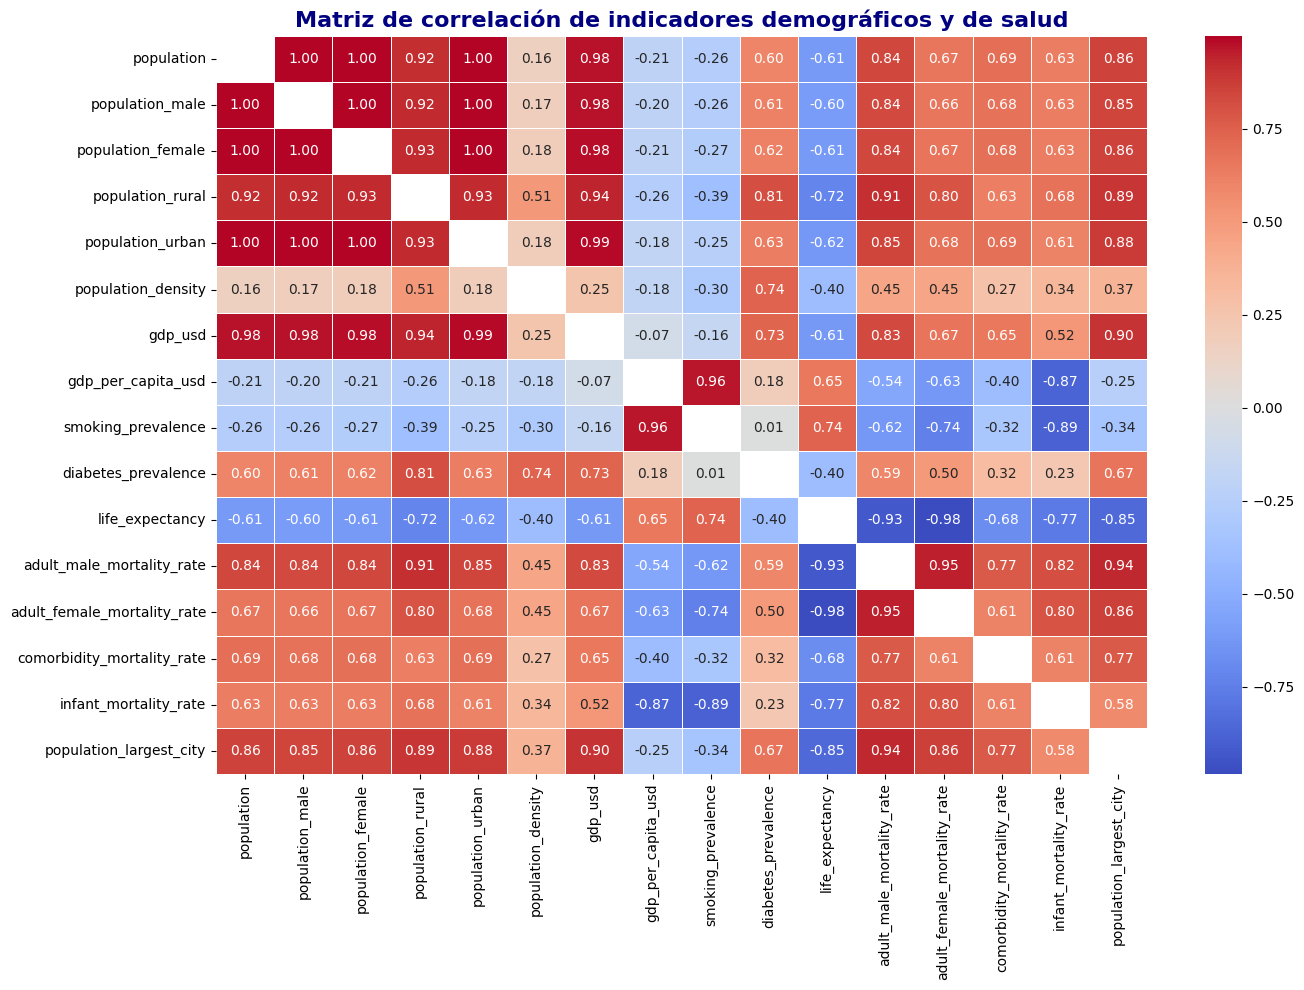

In [34]:
# Seleccionamos las columnas demográficas y de salud relevantes
indicadores = [
    'population', 'population_male', 'population_female', 'population_rural', 'population_urban',
    'population_density', 'gdp_usd', 'gdp_per_capita_usd',
    'smoking_prevalence', 'diabetes_prevalence',
    'life_expectancy',
    'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'comorbidity_mortality_rate', 'infant_mortality_rate', 'population_largest_city'

]

# generamos matriz de correlacion de indicadores demograficos y de salud 
matriz_corr = df_datos_filtrados[indicadores].corr(method='pearson')

# Creamos una máscara booleana para variables que estan reacionadas tanto positiva como negativamente, sin contar la diagonal porque sabemos que la diagonal siempre sera 1
mask = ~np.eye(matriz_corr.shape[0], dtype=bool)  #con esta linea quitamos la diagonal

# Visualiza la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=~mask, linewidths=0.5)  #usamos una paleta de colores coolwarm donde los valores positivos es rojo mientras que los 
# valores negativos son azules
plt.title("Matriz de correlación de indicadores demográficos y de salud", fontsize=16, fontweight='bold', color='navy')
plt.tight_layout()
plt.show()

>A partir de ahora se mostraran los graficos de dispersion  

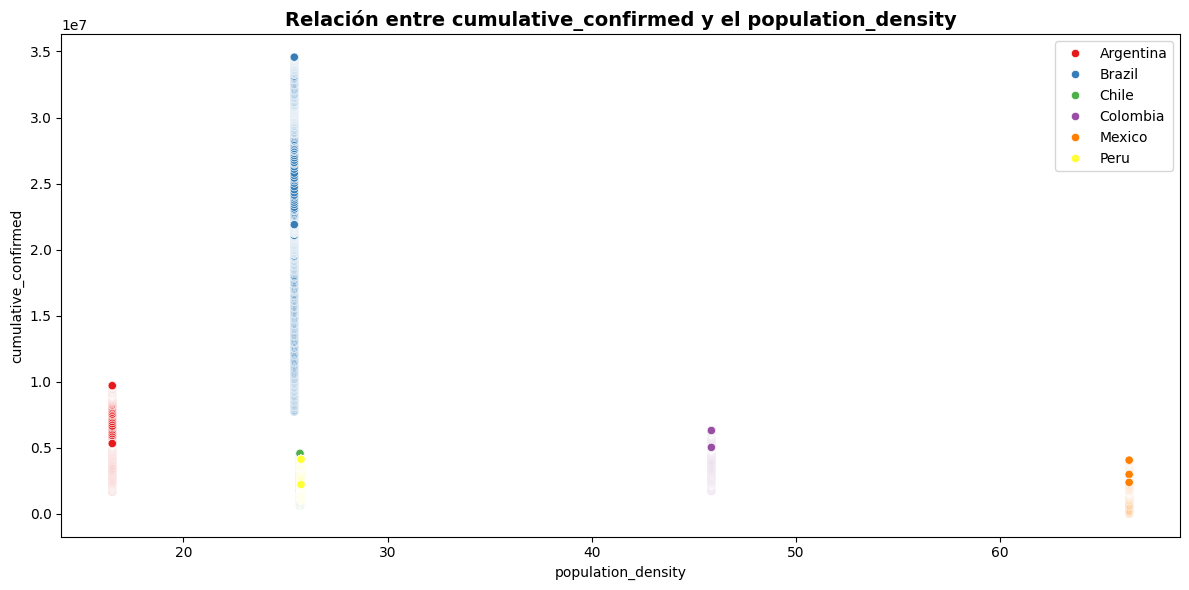

In [35]:
#Para estos graficos utilizaremos variables que segun mi criterio se pueden relacionar tanto positivo como negativamente, con estos graficos veremos tendencias, sesgos y graficos dispersos.

#para este grafico utilizamos la variable population_density y new_confirmed, para saber si entre mayor es la densidad poblacional, mayor es el numero de casos confirmados
plt.figure(figsize=(12, 6))

#utilizamos la libreria seaborn para generar un grafico de dispersion
sns.scatterplot(
    data=df_datos_filtrados,
    x='population_density',  
    y='cumulative_confirmed',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre cumulative_confirmed y el population_density', fontsize=14, fontweight='bold')
plt.xlabel('population_density')
plt.ylabel('cumulative_confirmed')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()


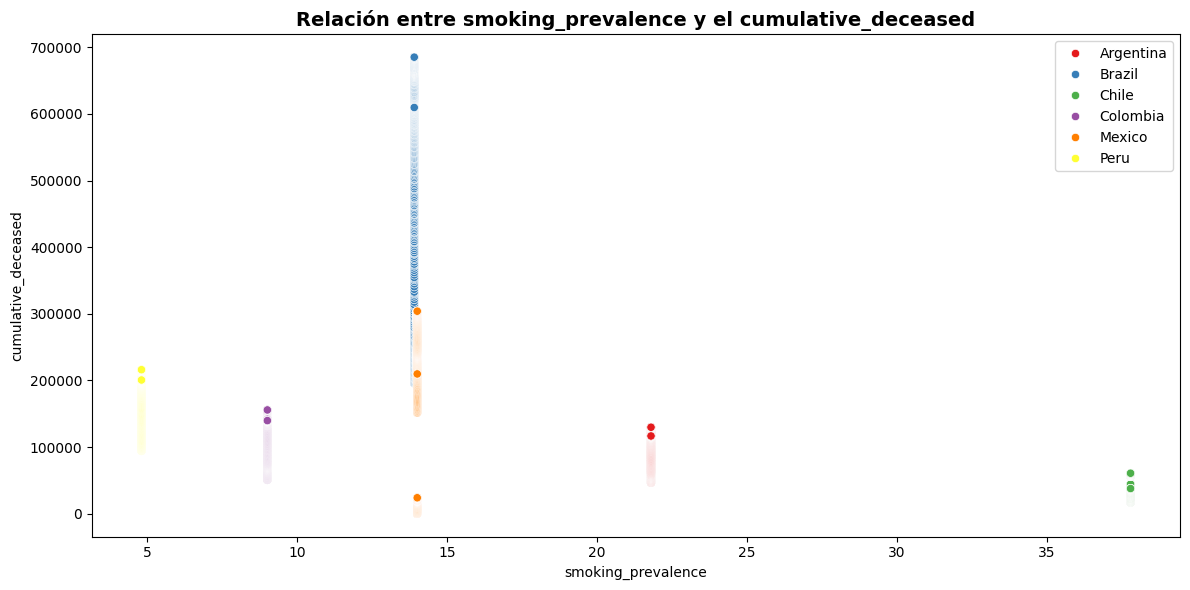

In [36]:
# para este grafico analizaremos si entre mas fumadores mas muertes hay, para esto utilizamos las variables smoking_prevalence y cumulative_deceased
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='smoking_prevalence',  
    y='cumulative_deceased',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre smoking_prevalence y el cumulative_deceased', fontsize=14, fontweight='bold')
plt.xlabel('smoking_prevalence')
plt.ylabel('cumulative_deceased')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()


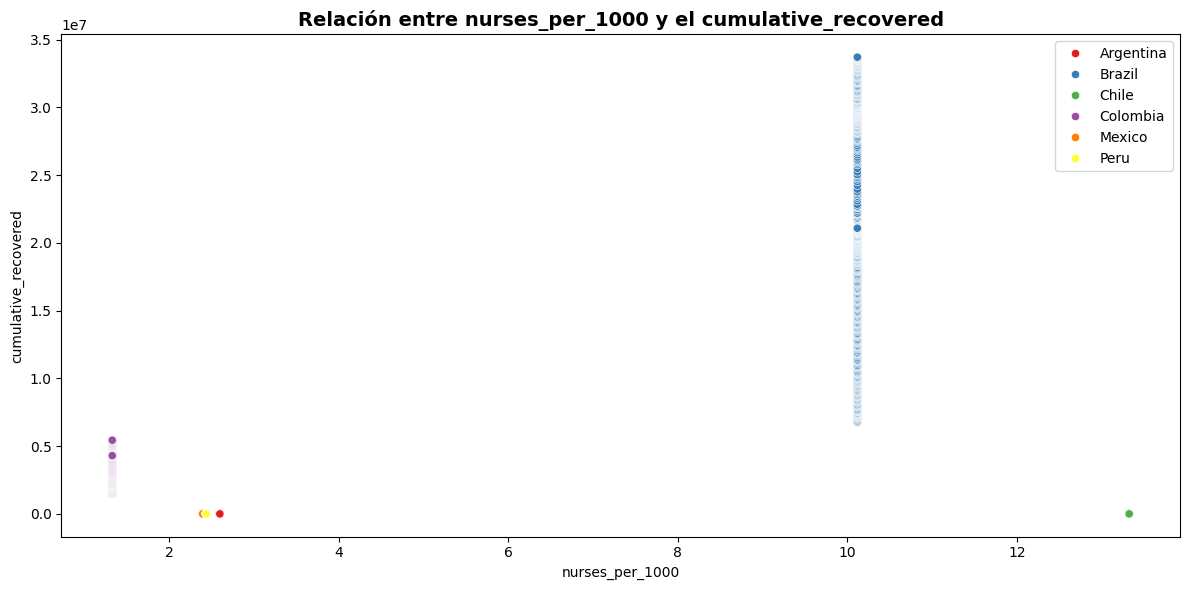

In [37]:
# para este grafico analizaremos si entre mas enfermeras mas casos recuperados hay
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='nurses_per_1000',  
    y='cumulative_recovered',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre nurses_per_1000 y el cumulative_recovered', fontsize=14, fontweight='bold')
plt.xlabel('nurses_per_1000')
plt.ylabel('cumulative_recovered')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

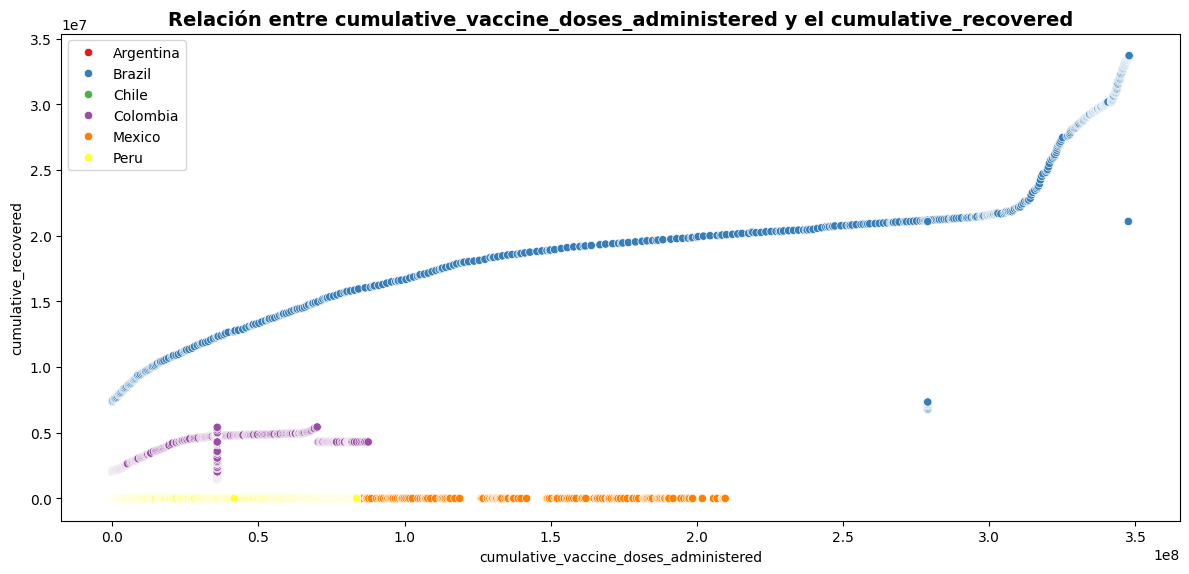

In [38]:
# para este grafico analizaremos si entre mas vacunas mas casos recuperados hay
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='cumulative_vaccine_doses_administered',  
    y='cumulative_recovered',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre cumulative_vaccine_doses_administered y el cumulative_recovered', fontsize=14, fontweight='bold')
plt.xlabel('cumulative_vaccine_doses_administered')
plt.ylabel('cumulative_recovered')
plt.legend(loc="upper left")    # Esquina superior derecha
plt.tight_layout()
plt.show()

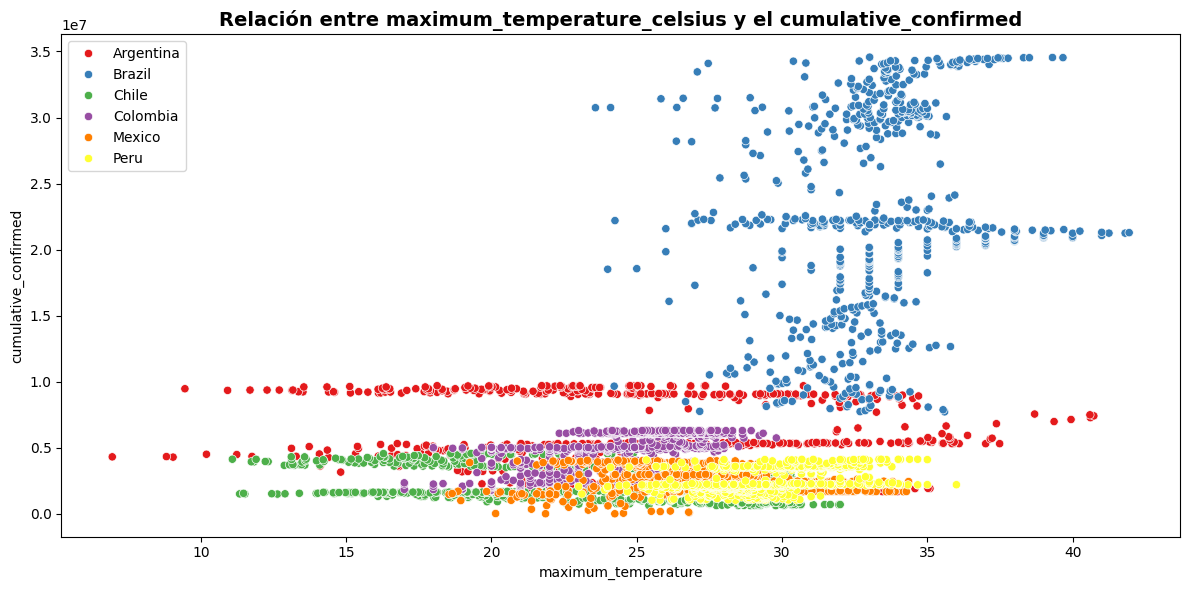

In [39]:
# para este grafico analizaremos si entre mas alta la temperatura mas casos confirmados hay 
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='maximum_temperature_celsius', 
    y='cumulative_confirmed',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre maximum_temperature_celsius y el cumulative_confirmed', fontsize=14, fontweight='bold')
plt.xlabel('maximum_temperature')
plt.ylabel('cumulative_confirmed')
plt.legend(loc="upper left")    # Esquina superior derecha
plt.tight_layout()
plt.show()

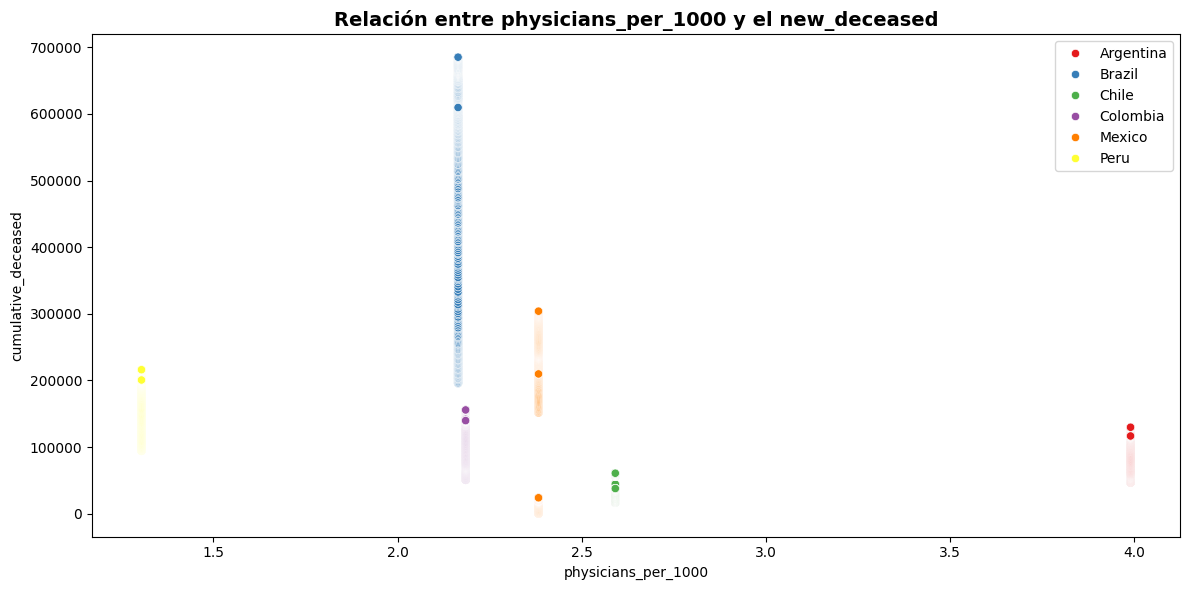

In [40]:
# para este grafico analizaremos si entre menos medicos haya mas casos fallecidos hay 

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='physicians_per_1000',  
    y='cumulative_deceased',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre physicians_per_1000 y el new_deceased', fontsize=14, fontweight='bold')
plt.xlabel('physicians_per_1000')
plt.ylabel('cumulative_deceased')
plt.legend(loc="upper right")    # Esquina inferior derecha
plt.tight_layout()
plt.show()

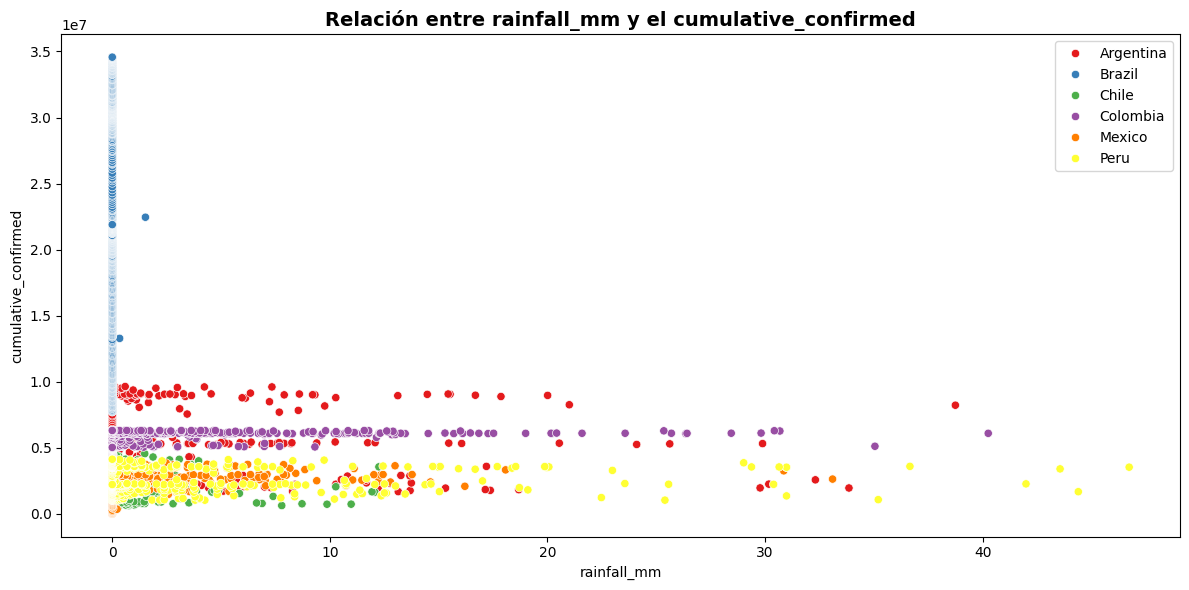

In [41]:
# para este grafico analizaremos si las lluvias afectan los casos confirmados
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='rainfall_mm',  
    y='cumulative_confirmed',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre rainfall_mm y el cumulative_confirmed', fontsize=14, fontweight='bold')
plt.xlabel('rainfall_mm')
plt.ylabel('cumulative_confirmed')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

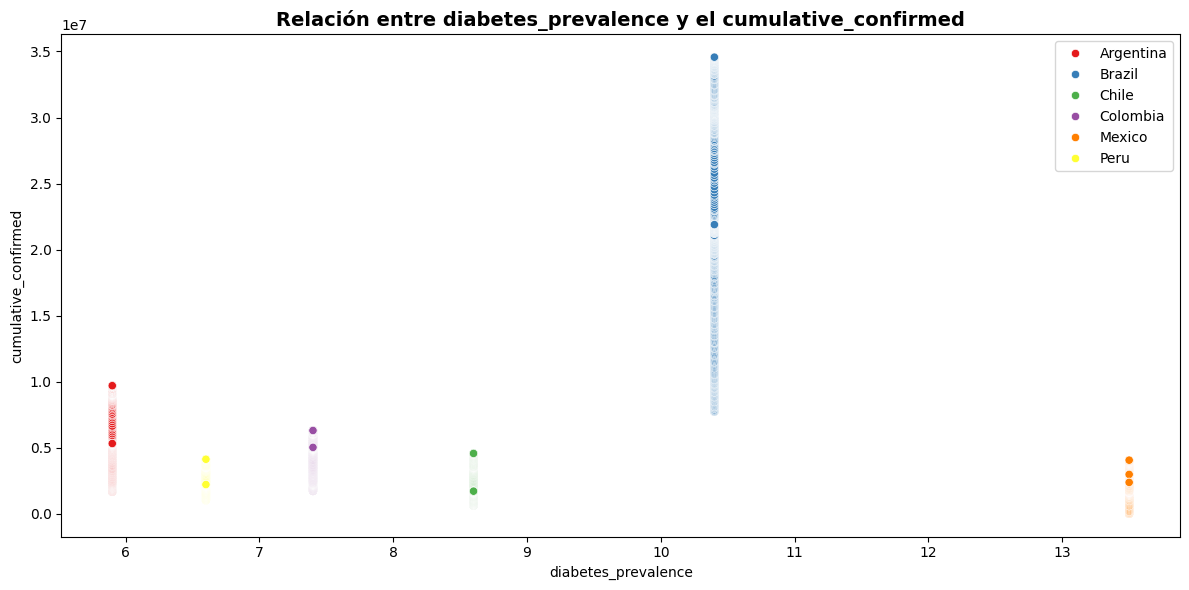

In [42]:
# para este grafico analizaremos si es mas propenso quedar contagiado si sees diabetico

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='diabetes_prevalence',  
    y='cumulative_confirmed',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre diabetes_prevalence y el cumulative_confirmed', fontsize=14, fontweight='bold')
plt.xlabel('diabetes_prevalence')
plt.ylabel('cumulative_confirmed')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

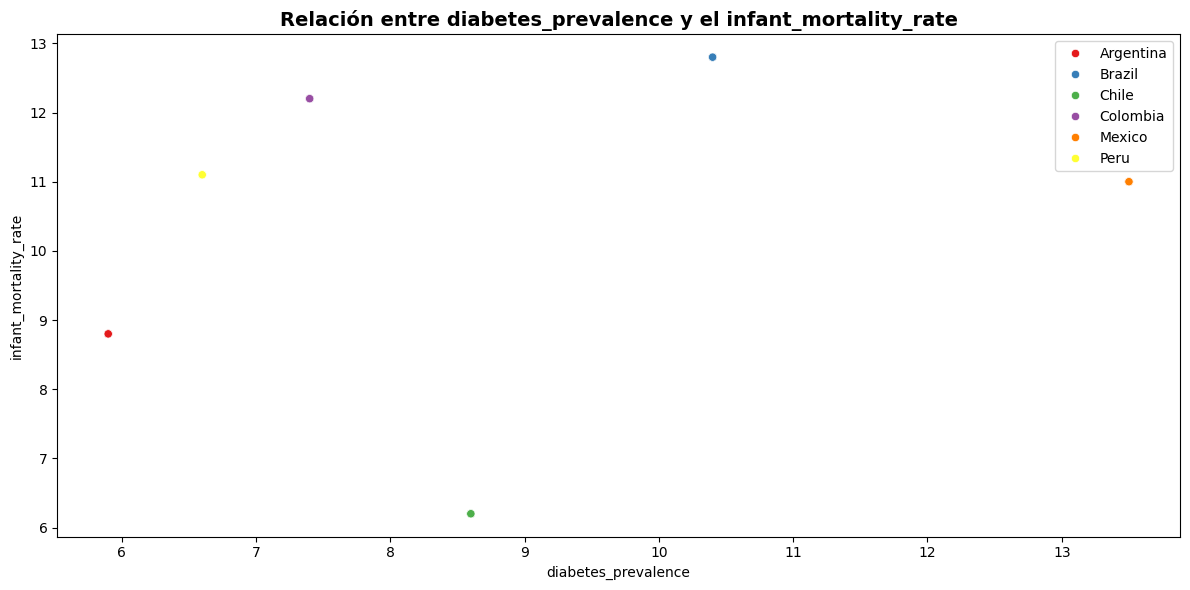

In [43]:
# para este grafico compararemos la prevalencia de diabetes vs tasa de mortalidad infantil

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='diabetes_prevalence',  
    y='infant_mortality_rate',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre diabetes_prevalence y el infant_mortality_rate', fontsize=14, fontweight='bold')
plt.xlabel('diabetes_prevalence')
plt.ylabel('infant_mortality_rate')
plt.legend(loc="upper right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

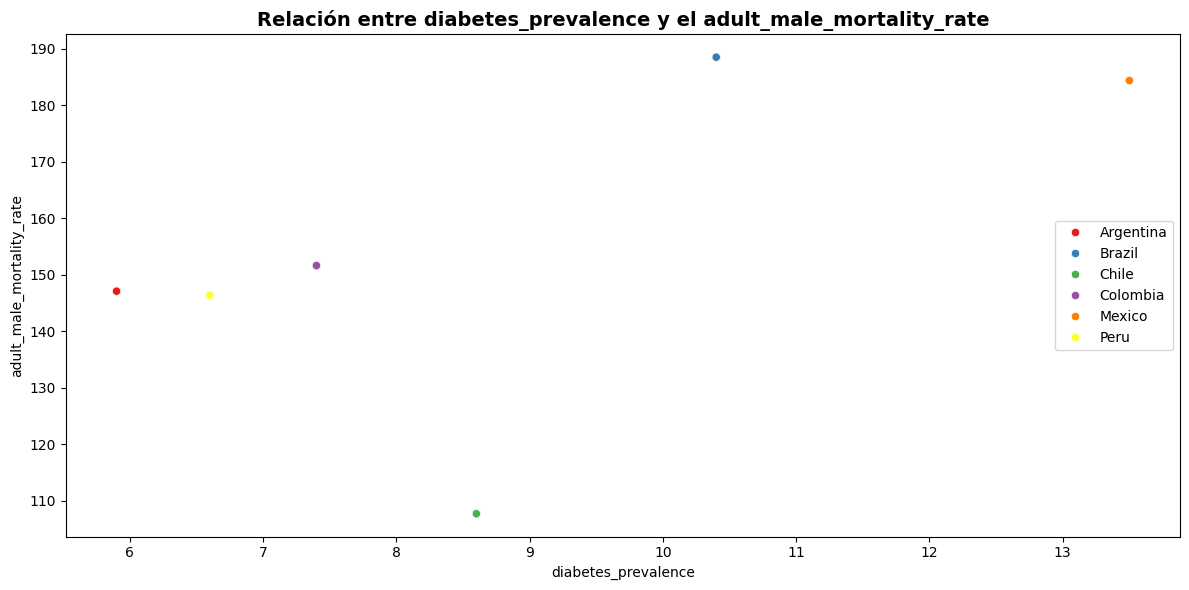

In [44]:
# para este grafico compararemos la prevalencia de diabetes vs tasa de mortalidad masculina

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='diabetes_prevalence',  
    y='adult_male_mortality_rate',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre diabetes_prevalence y el adult_male_mortality_rate', fontsize=14, fontweight='bold')
plt.xlabel('diabetes_prevalence')
plt.ylabel('adult_male_mortality_rate')
plt.legend(loc="center right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

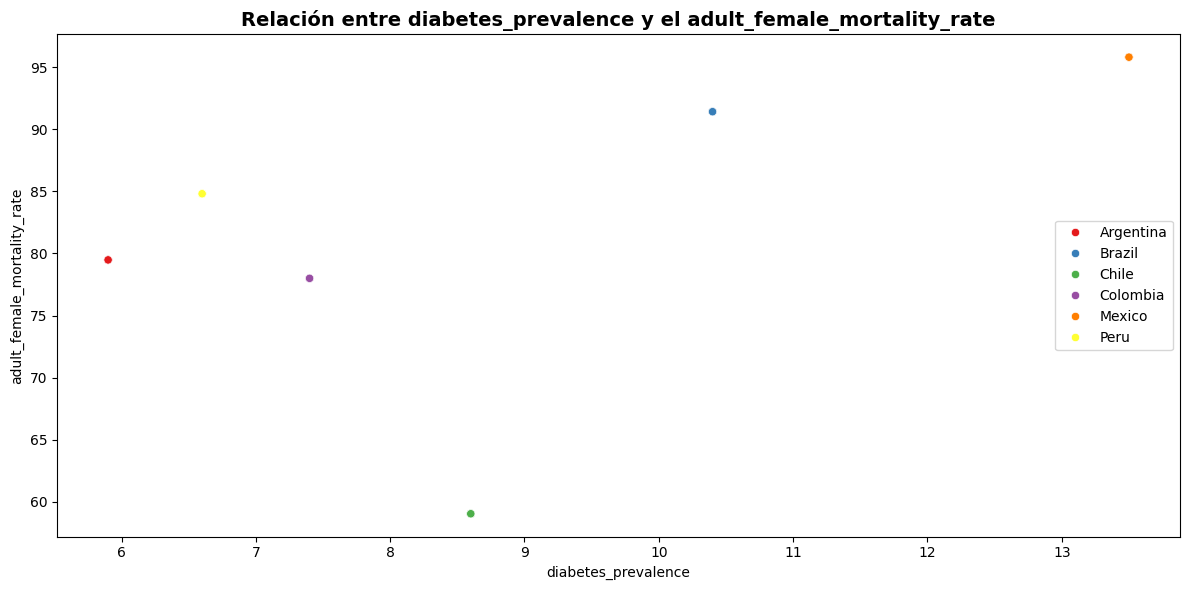

In [45]:
# para este grafico compararemos la prevalencia de diabetes vs tasa de mortalidad femenina

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_datos_filtrados,
    x='diabetes_prevalence',  
    y='adult_female_mortality_rate',
    hue='country_name',  # Categoriza por país
    palette='Set1',     
)

plt.title('Relación entre diabetes_prevalence y el adult_female_mortality_rate', fontsize=14, fontweight='bold')
plt.xlabel('diabetes_prevalence')
plt.ylabel('adult_female_mortality_rate')
plt.legend(loc="center right")    # Esquina superior derecha
plt.tight_layout()
plt.show()

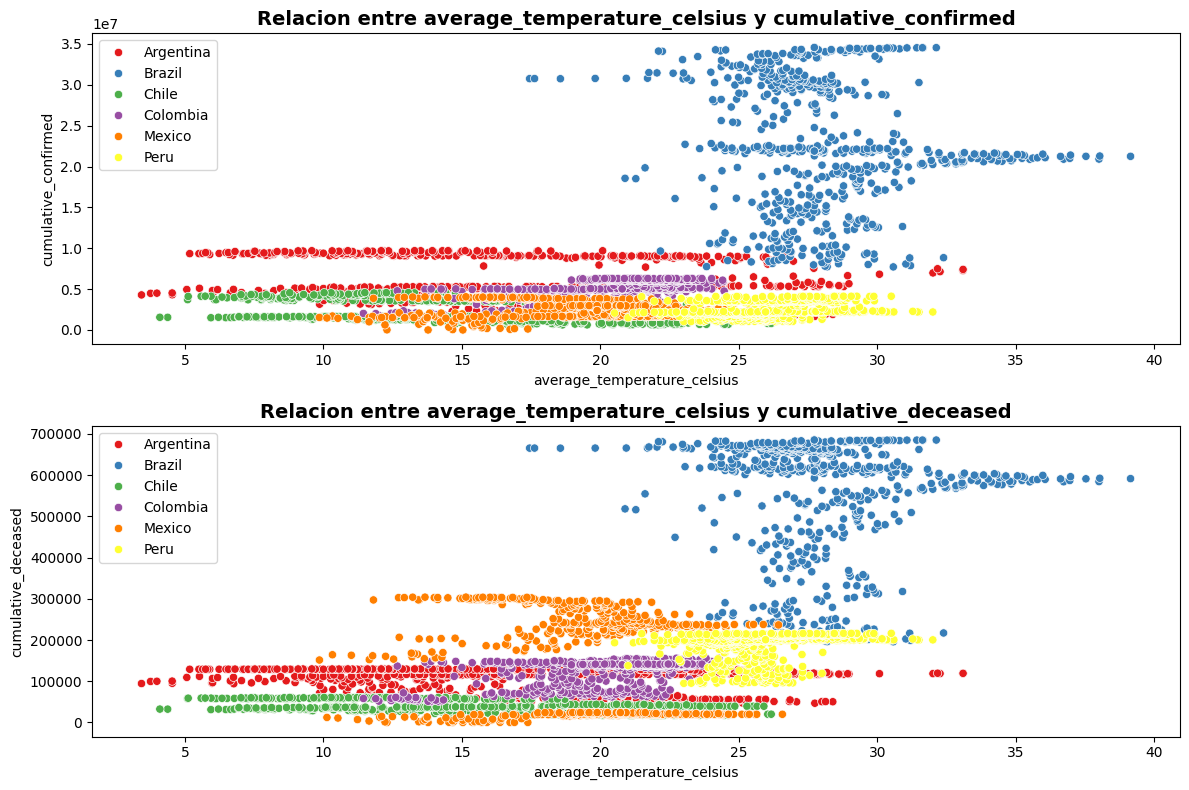

In [46]:
#aqui generamos dos subgráficos para comparar que tantas personas fallecieron con respecto a la temperatura promedio
fig, axs = plt.subplots(2, 1, figsize=(12, 8))  # 2 filas X 1 columna

# Primer subgráfico casos confirmados segun la temperatura promedio
sns.scatterplot(data=df_datos_filtrados, x='average_temperature_celsius', y='cumulative_confirmed', hue="country_name", palette='Set1', ax=axs[0]) 
axs[0].set_title('Relacion entre average_temperature_celsius y cumulative_confirmed', fontsize=14, fontweight='bold')
axs[0].legend(loc="upper left")  # Esquina superior derecha
 
# Segundo subgráfico casos fallecidos segun la temperatura promedio
sns.scatterplot(data=df_datos_filtrados, x='average_temperature_celsius', y='cumulative_deceased', hue="country_name", palette='Set1', ax=axs[1]) 
axs[1].set_title('Relacion entre average_temperature_celsius y cumulative_deceased', fontsize=14, fontweight='bold')
axs[1].legend(loc="upper left")  # Esquina superior derecha
plt.tight_layout()
plt.show()

>A partir de ahora se mostraron los ultimos tipós de graficos que son boxplot y violinplot

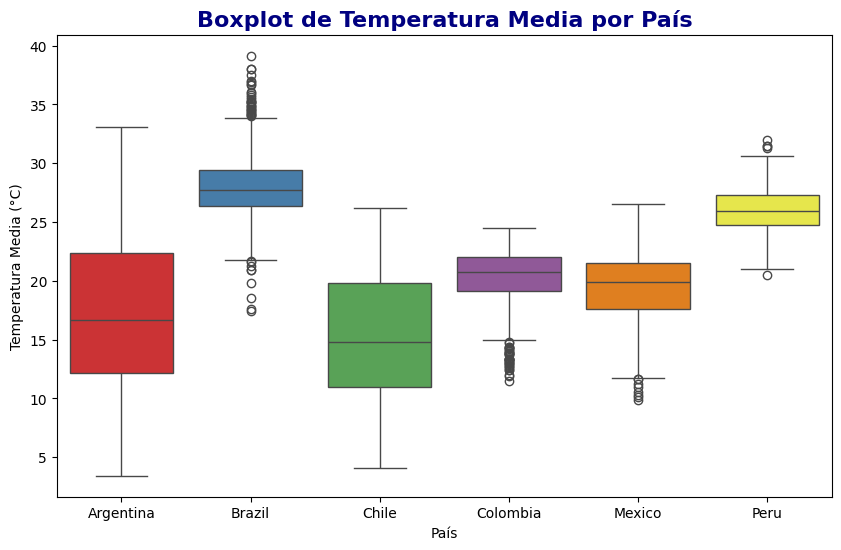

In [47]:
#graficamos el boxplot para la variable average_temperature_celsius por country_name para ver la dispersion de los datos y si hay outliers
plt.figure(figsize=(10, 6))

#generamos un boxplot con la libreria seaborn donde comparamos la dispersion de los datos entre paises 
sns.boxplot(x='country_name', y='average_temperature_celsius', data=df_datos_filtrados, palette='Set1', hue='country_name')
plt.title('Boxplot de Temperatura Media por País', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.show()

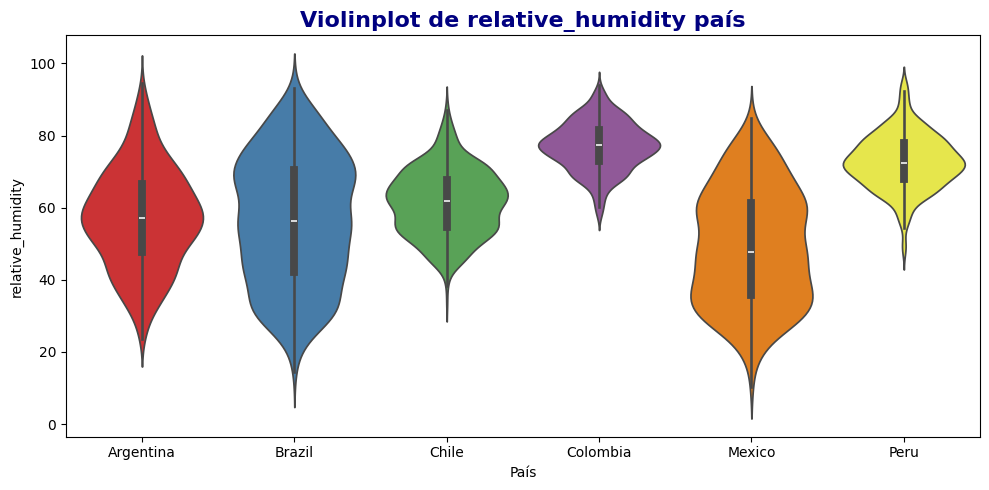

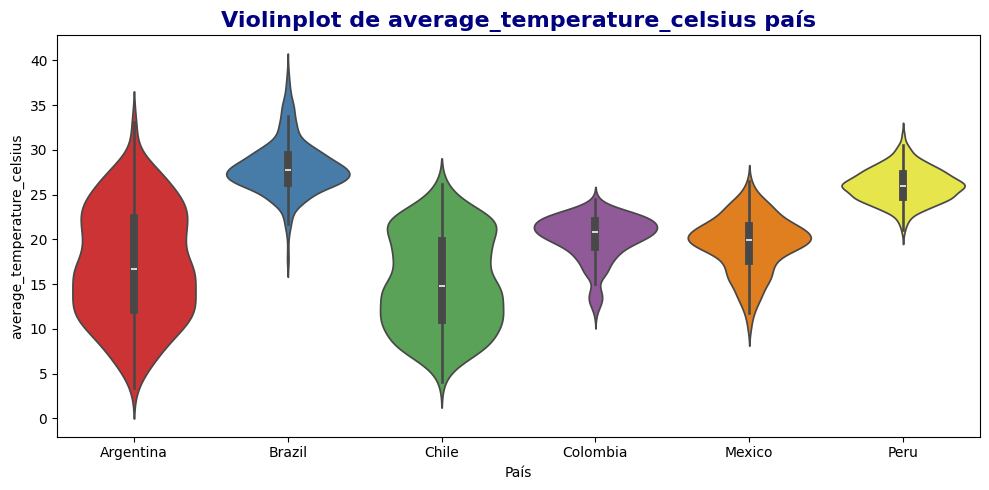

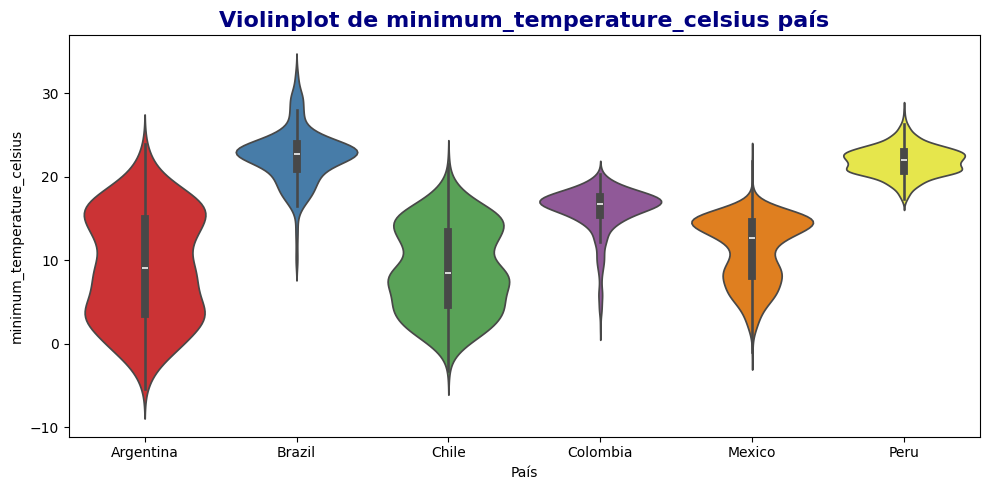

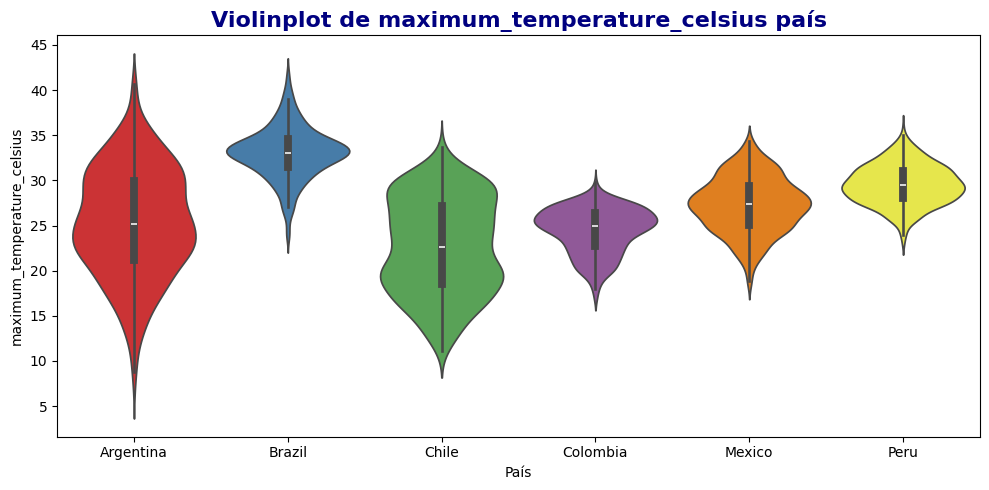

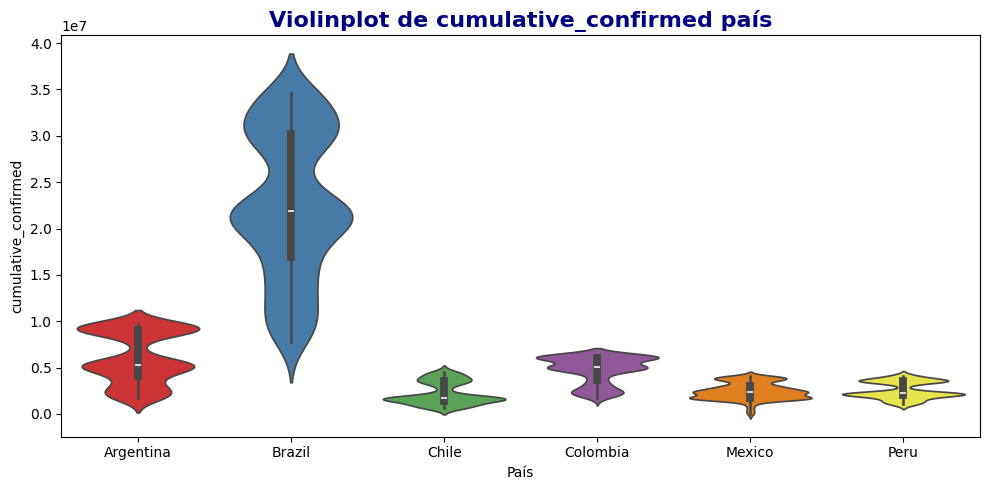

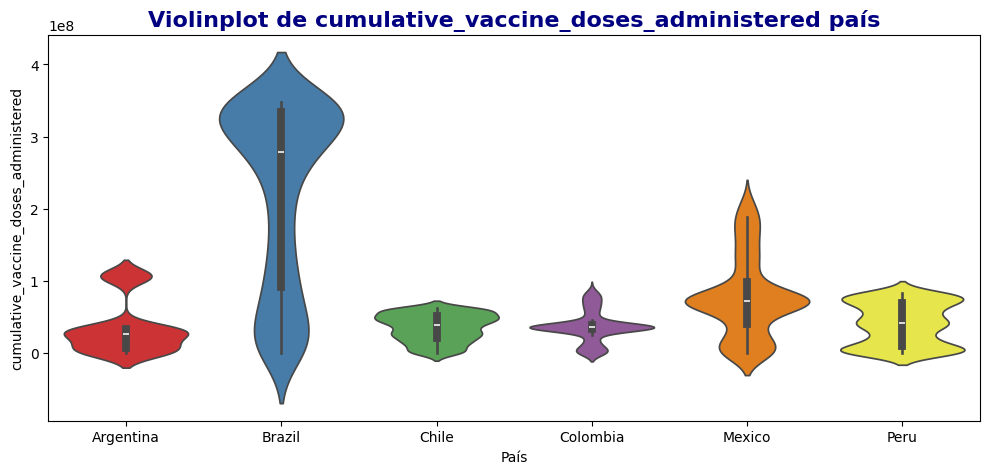

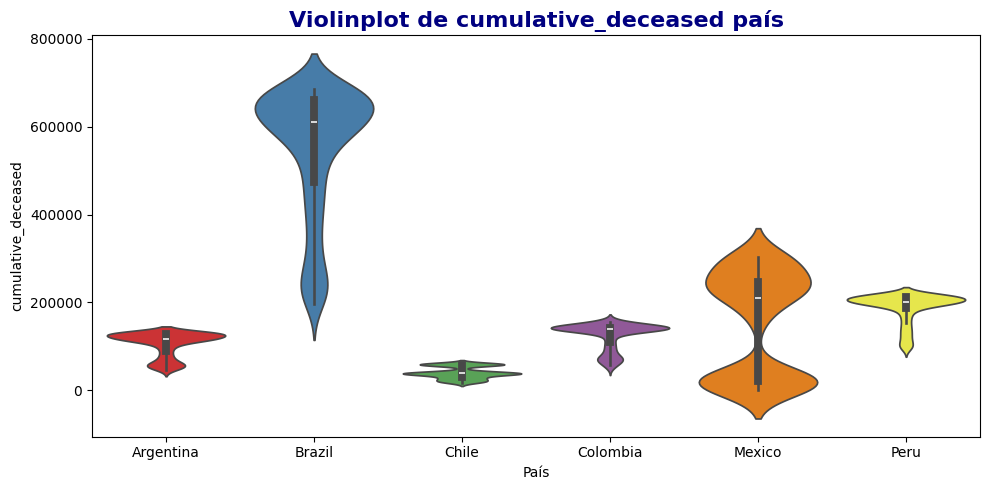

In [48]:
#Grafico de violinplot para las variables numericas por country_name, para ver la distribucion de los datos y si hay outliers

#en esta grafica seleccionamos las variables que no tienen picos tan altos sino datos que no estan tan alejados para visualizar mejor la informacion y visualizar mejor el grafico 
columnas_numericas = df_datos_filtrados.select_dtypes(include=[np.number]).columns

#las columnas que se eligieron son las que estan mas cerca a la media para que el grafico no se vea tan distorcionado
columnas_elegidas = ['relative_humidity', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'cumulative_confirmed', 
                     'cumulative_vaccine_doses_administered', 'cumulative_deceased']

for columna in columnas_elegidas:
    plt.figure(figsize=(10, 5))
    
    #a diferecnia del boxplot, el violinplot muestra la distribucion de los datos y la densidad de los mismos para saber que dato se repite mas
    sns.violinplot(x='country_name', y=columna, data=df_datos_filtrados, palette='Set1', hue="country_name")
    plt.title(f'Violinplot de {columna} país', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('País') 
    plt.ylabel(columna)
    plt.tight_layout()
    plt.show()

##### • Identificacion de tendencia y patrones:

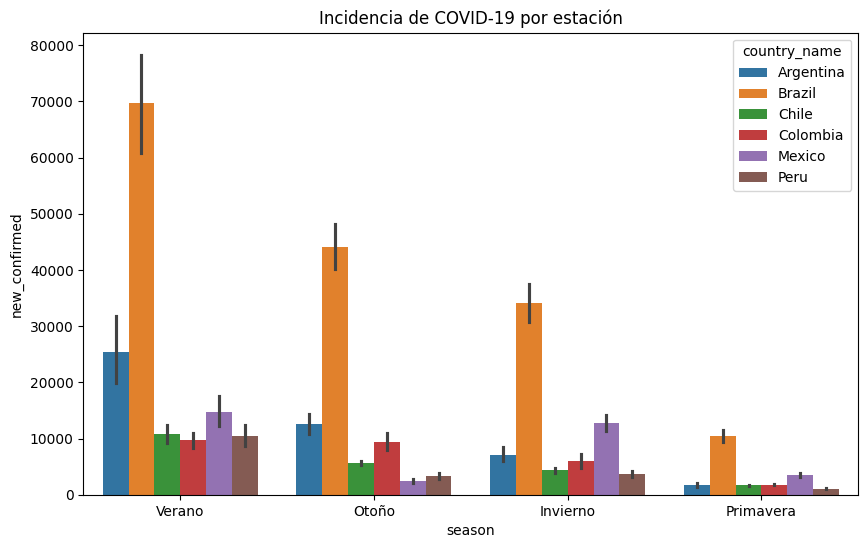

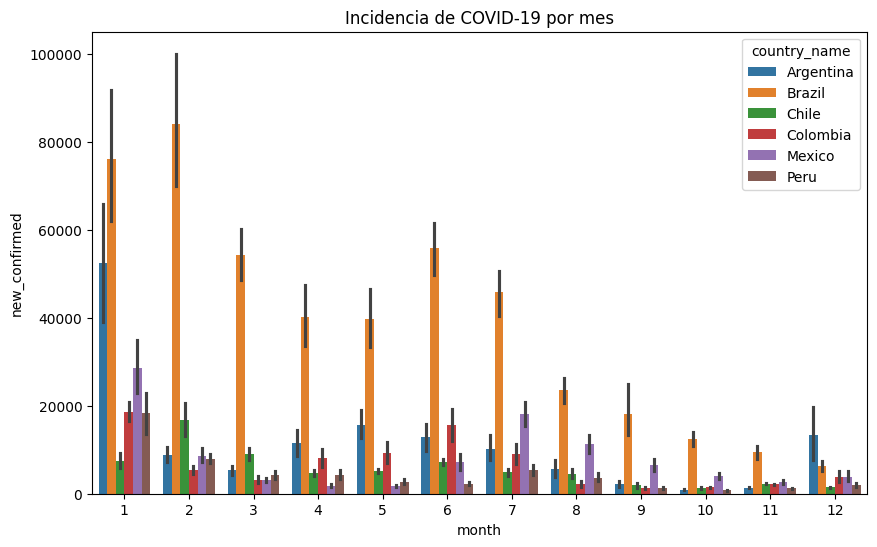

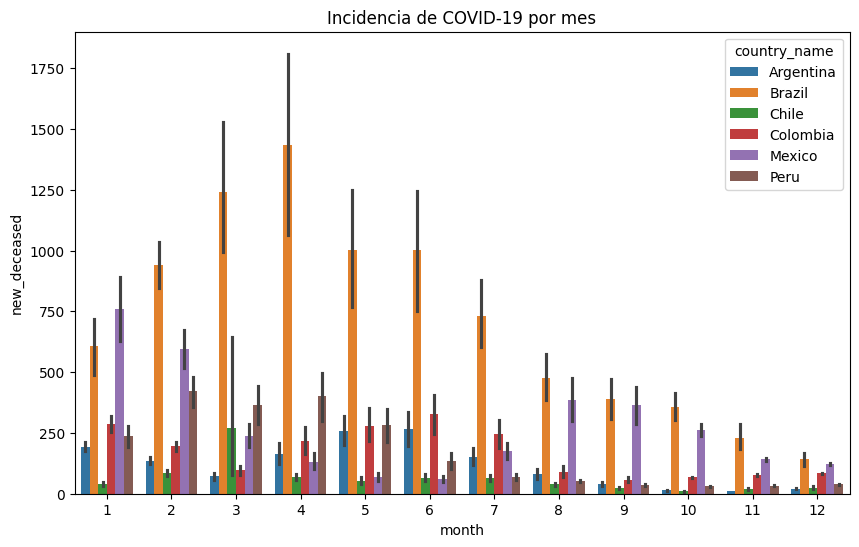

In [ ]:
#Para esta ocacion analizaremos los casos de covid confirmados tanto por temporada estacional como en mes para verificar en que temporada y en que mes hay mas confirmados 

# Restablecer el índice para que 'date' vuelva a ser una columna
df_datos_filtrados.reset_index(inplace=True)

# Definir la función para obtener la estación
def get_season(date):
    month = date.month
    day = date.day
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 20):
        return 'Verano'
    elif (month == 3 and day >= 20) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'Otoño'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 23):
        return 'Invierno'
    else:
        return 'Primavera'

# Aplicar la función para obtener la estación
df_datos_filtrados['season'] = df_datos_filtrados['date'].apply(get_season)

# Graficar la incidencia de COVID-19 por estación
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='season', y='new_confirmed', data=df_datos_filtrados, hue='country_name')
plt.title('Incidencia de COVID-19 por estación')
plt.show()

# Graficar la incidencia de COVID-19 por mes
fig, ax = plt.subplots(figsize=(10, 6))
df_datos_filtrados['month'] = df_datos_filtrados['date'].dt.month
sns.barplot(x='month', y='new_confirmed', data=df_datos_filtrados, hue='country_name')
plt.title('Incidencia de COVID-19 por mes')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
df_datos_filtrados['month'] = df_datos_filtrados['date'].dt.month
sns.barplot(x='month', y='new_deceased', data=df_datos_filtrados, hue='country_name')
plt.title('Incidencia de COVID-19 por mes')
plt.show() 

# Ponemos como índice la columna "date" para poder hacer un análisis de los datos a lo largo del tiempo.
df_datos_filtrados['date'] = pd.to_datetime(df_datos_filtrados['date'])
df_datos_filtrados.set_index('date', inplace=True)

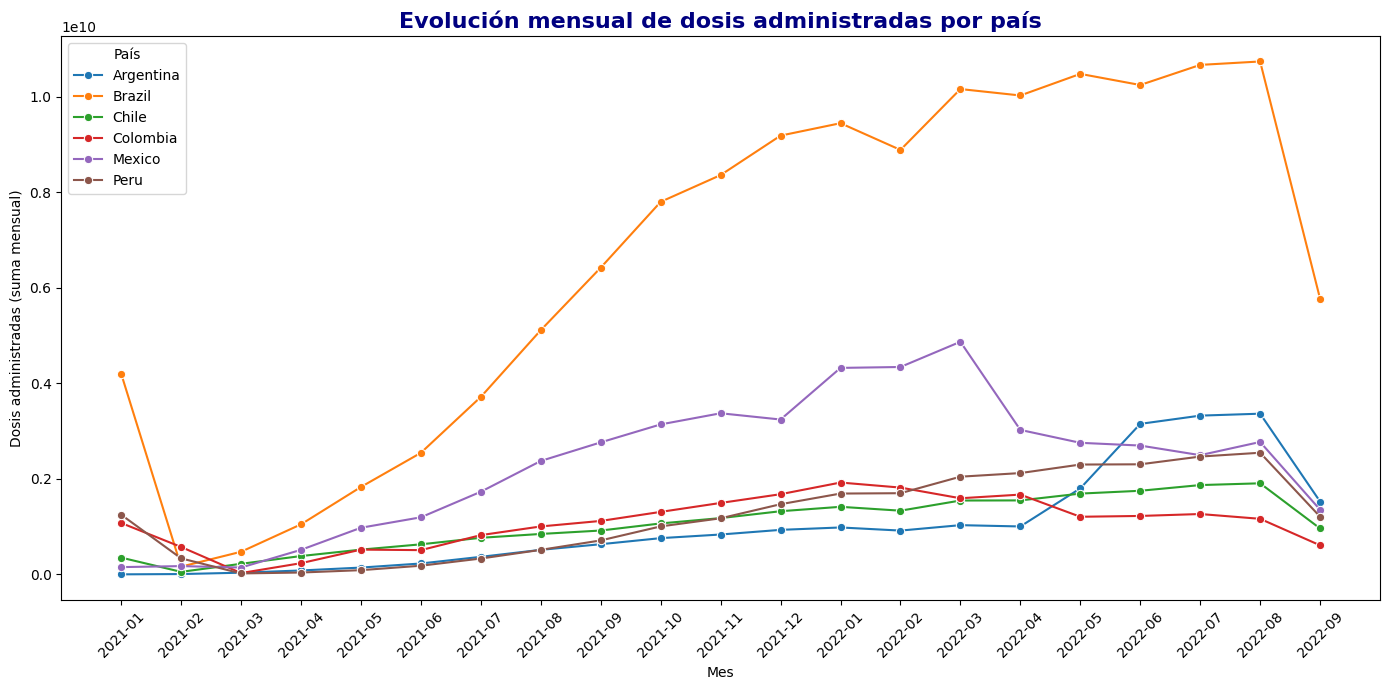

In [50]:
# Para esta ocacion verificaremos la dosis administrada mensualmente

df_datos_filtrados.reset_index(inplace=True)

# Crear columna de año-mes
df_datos_filtrados['year_month'] = df_datos_filtrados['date'].dt.to_period('M').astype(str)

# Agrupar por país y mes, sumando las dosis administradas
evolucion_dosis = df_datos_filtrados.groupby(['country_name', 'year_month'])['cumulative_vaccine_doses_administered'].sum().reset_index()

#generamos el grafico de la evolucion de dosis administradas por mes y pais
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=evolucion_dosis,
    x='year_month',
    y='cumulative_vaccine_doses_administered',
    hue='country_name',
    marker='o' # Añadimos marcadores para cada mes
)

plt.title('Evolución mensual de dosis administradas por país', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes')
plt.ylabel('Dosis administradas (suma mensual)')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()
plt.show()
df_datos_filtrados['date'] = pd.to_datetime(df_datos_filtrados['date'])
df_datos_filtrados.set_index('date', inplace=True)

## 3° avance del PI


##### • Análisis temporal comparando casos confirmados, muertes y recuperados mensualmente. 


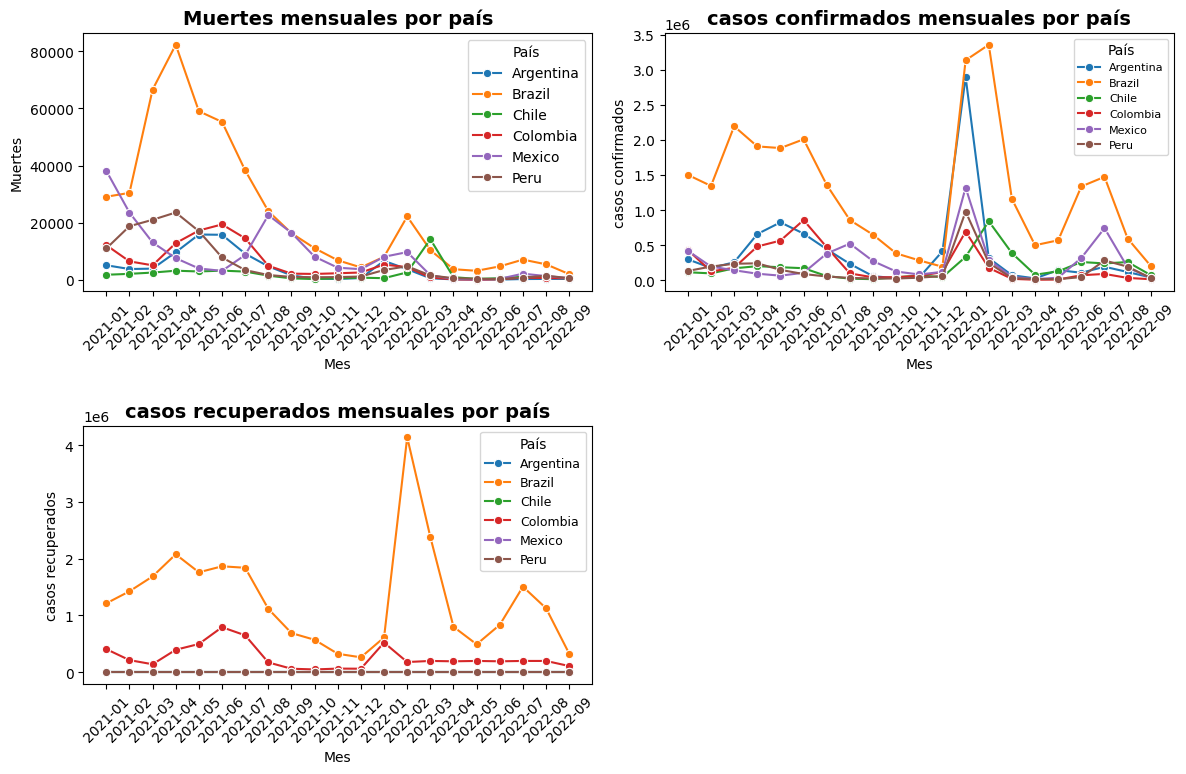

In [51]:
#generamos 3 graficos de lineas para ver la evolucion de los casos confirmados, muertes y recuperados por mes y pais
#para esta ocacion utilizamos subplots para poder ver los 3 subgraficos en una sola figura pare reducir espacio
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 filas, 2 columnas
fig.delaxes(axs[1, 1])  # Elimina el cuarto subplot vacío


# generamos 3 variables donde se agrupan los valores de casos confirmados, recuperados y fallecidos por pais 
muertes_mes = df_datos_filtrados.groupby(['country_name', 'year_month'])['new_deceased'].sum().reset_index()
casos_mes = df_datos_filtrados.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()
recuperados_mes = df_datos_filtrados.groupby(['country_name', 'year_month'])['new_recovered'].sum().reset_index()


# Primer subgráfico casos fallecidos mensuales por país
#rotamos las etiquetas del eje x para que se pueda visualizar mejor las fechas y no se superpongan 
sns.lineplot(
    data=muertes_mes,
    x='year_month',
    y='new_deceased',
    hue='country_name',
    marker='o', ax=axs[0, 0]
)
axs[0, 0].set_title('Muertes mensuales por país', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Mes')
axs[0, 0].set_ylabel('Muertes')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].legend(title='País')  # Leyenda en el primer subplot

# Segundo subgráfico casos confirmados mensuales por país
sns.lineplot(
    data=casos_mes,
    x='year_month',
    y='new_confirmed',
    hue='country_name',
    marker='o', ax=axs[0, 1]
)
axs[0, 1].set_title('casos confirmados mensuales por país', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Mes')
axs[0, 1].set_ylabel('casos confirmados')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(title='País', fontsize=8, title_fontsize=10)  # Leyenda en el segundo subplot, se adecuo el tamaño de la leyenda para poder visualizar mejor la información


#tercer subgráfico casos recuperados mensuales por país
sns.lineplot(
    data=recuperados_mes,
    x='year_month',
    y='new_recovered',
    hue='country_name',
    marker='o', ax=axs[1, 0]
)
axs[1, 0].set_title('casos recuperados mensuales por país', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Mes')
axs[1, 0].set_ylabel('casos recuperados')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].legend(title='País', fontsize=9, title_fontsize=10)  # Leyenda en el tercer subplot


plt.tight_layout()
plt.show()

##### • Tasa de crecimiento (%). 


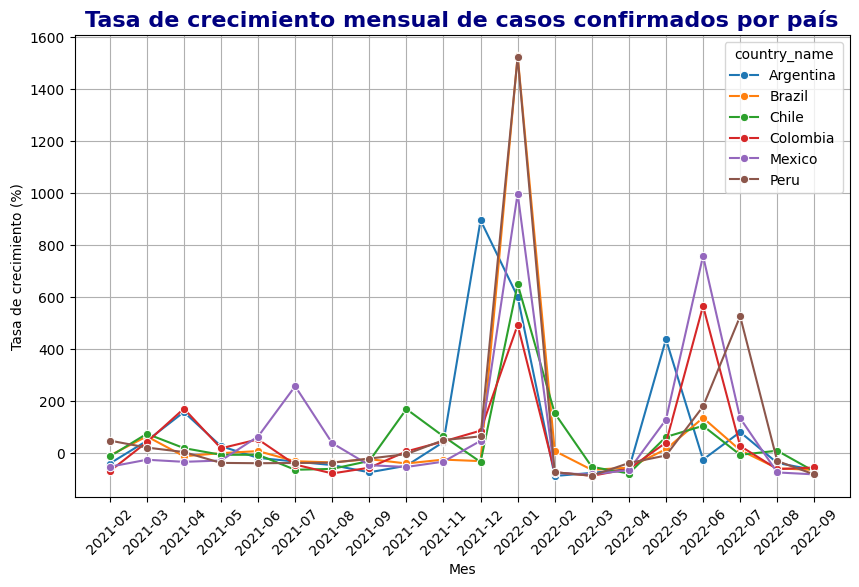

In [52]:
# Calcular tasa de crecimiento por país
casos_mes['tasa_crecimiento'] = casos_mes.groupby('country_name')['new_confirmed'].pct_change() * 100   #agrupamos los datos por pais y calculamos el porcentaje teniendo en cuenta el 
#valor anterior con el actual para visualizar el crecimiento de los casos confirmados mes a mes

#realizamos un grafico de lineas que es mejor para visualizar la tendencia
plt.figure(figsize=(10, 6))
sns.lineplot(data=casos_mes, x='year_month', y='tasa_crecimiento', hue='country_name', marker='o')

plt.title('Tasa de crecimiento mensual de casos confirmados por país', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes')
plt.ylabel('Tasa de crecimiento (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### • Progreso de la vacunacion por pais. 

Text(0.5, 1.0, 'Total de vacunas suministradas por pais')

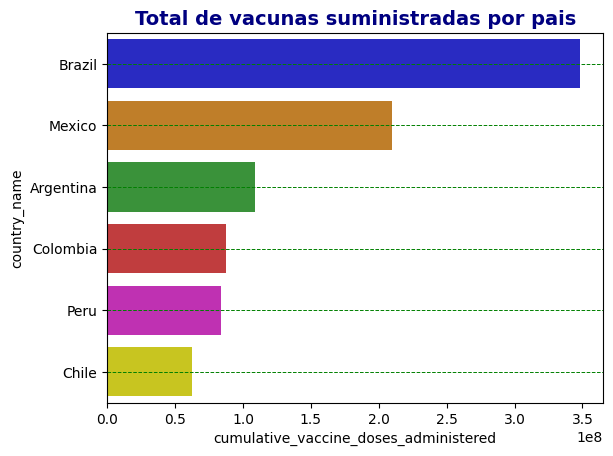

In [ ]:
# para el grafico de total de dosis suministrada como la columna es un acumulado no podemos sumar toda la columna por pais porque no tiene sentido, para esta ocasion buscamos el ultimo valor
# de la columna por pais 

#generamos una variable con el valor maximo de la columna cumulative_vaccine_doses_administered por pais
max_acumulado=df_datos_filtrados.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index()
#lo ordenamos de mayor a menor para visualizar mejor el grafico
max_acumulado = max_acumulado.sort_values(by='cumulative_vaccine_doses_administered', ascending=False)
sns.barplot(y='country_name', x='cumulative_vaccine_doses_administered', data=max_acumulado, hue="country_name", palette=colores)
plt.grid(True, linestyle='--', linewidth=0.7, color='green', axis='y')  #Activa lineas horizontales para una mejor visualización
plt.title(f'Total de vacunas suministradas por pais', fontsize=14, fontweight='bold', color='navy')

##### • Impacto de la Urbanización en la Propagación del Covid-19. 

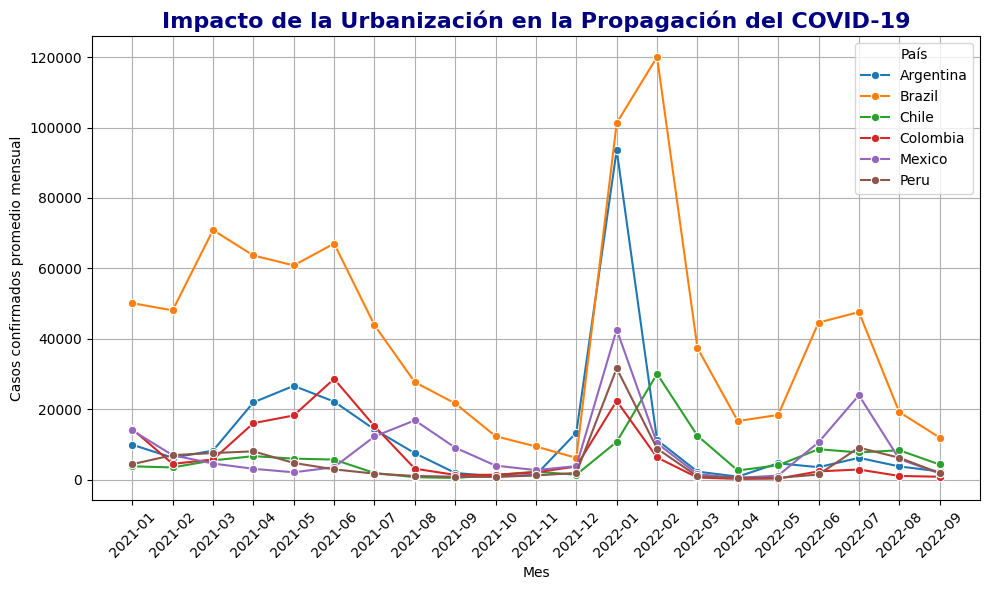

In [54]:
# Agrupar por país a lo largo de cada mes teniendo en cuenta la poblacion urbana
df_mensual = df_datos_filtrados.groupby(['country_name', 'year_month'])[['new_confirmed', 'population_urban']].mean().reset_index()

# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mensual, x='year_month', y='new_confirmed', hue='country_name', palette='tab10', marker="o")

# Personalización
plt.title('Impacto de la Urbanización en la Propagación del COVID-19', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Mes')
plt.ylabel('Casos confirmados promedio mensual')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(True)
plt.tight_layout()
plt.show()


##### • Evolucion semanal de casos nuevos. 

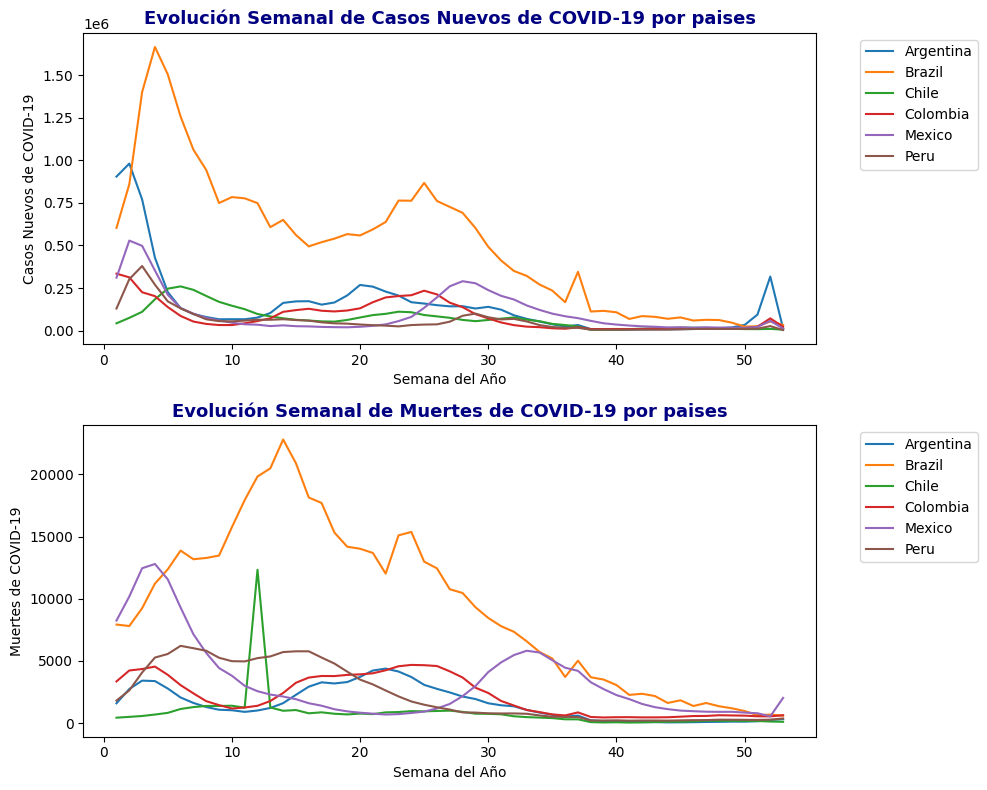

In [55]:
# se crea una columna de tipo semana basandonos en la columna de tipo fecha de nuestro dataset 
df_datos_filtrados['week'] = df_datos_filtrados.index.isocalendar().week  # Nos devuelve en términos ISO el número de semana

# Vamos a analizar cómo evolucionan los casos de COVID-19 por paises a lo largo del tiempo por semana, agrupamos por pais y semana y sumamos los casos nuevos confirmados y fallecidos
# convertimos el indice jerarquico en columnas normales
weekly_cases = df_datos_filtrados.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 8))  # generamos dos subgraficos con una matriz de 2 filas X 1 columna
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)  #identificamos cada linea en la leyenda
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=country)

# Etiquetas para el primer subgráfico
ax[0].set_xlabel('Semana del Año')
ax[0].set_ylabel('Casos Nuevos de COVID-19')
ax[0].set_title('Evolución Semanal de Casos Nuevos de COVID-19 por paises', fontsize=13, fontweight='bold', color='navy')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas para el segundo subgráfico
ax[1].set_xlabel('Semana del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Semanal de Muertes de COVID-19 por paises', fontsize=13, fontweight='bold', color='navy')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# convertimos otra vez la columna date en tipo fecha para esta ocacion reseteamos el indice
df_datos_filtrados.reset_index(inplace=True)
df_datos_filtrados['date'] = pd.to_datetime(df_datos_filtrados['date']) #nos aseguramos que la columna date sea de tipo fecha



##### • Distribución de edad por paises. 

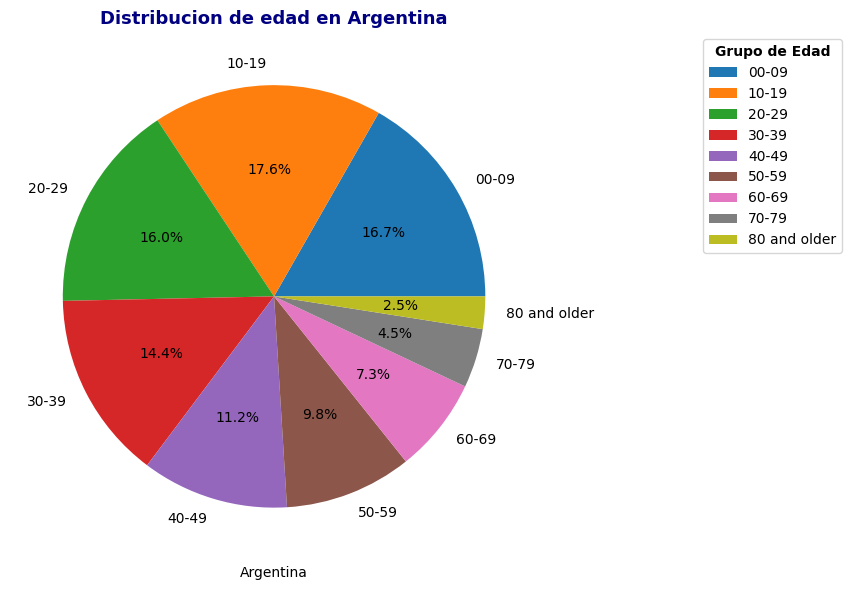

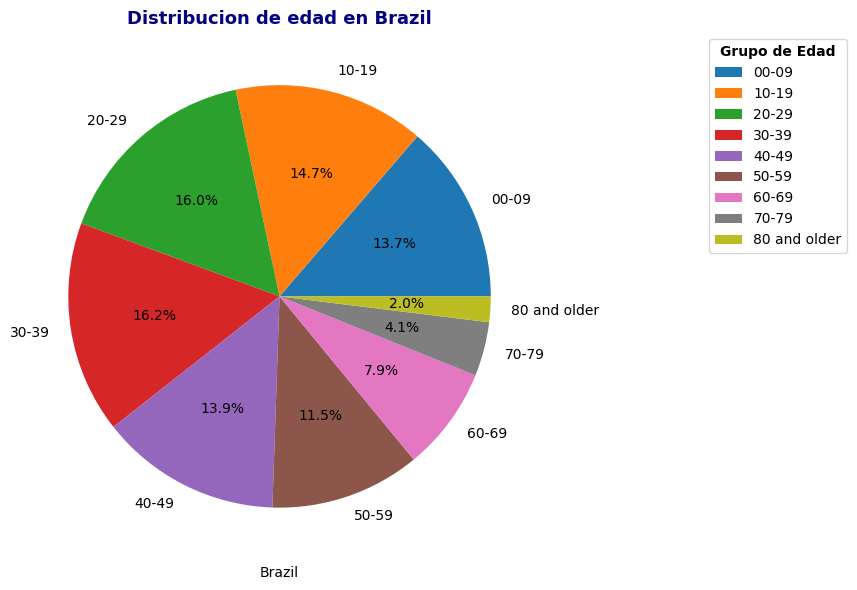

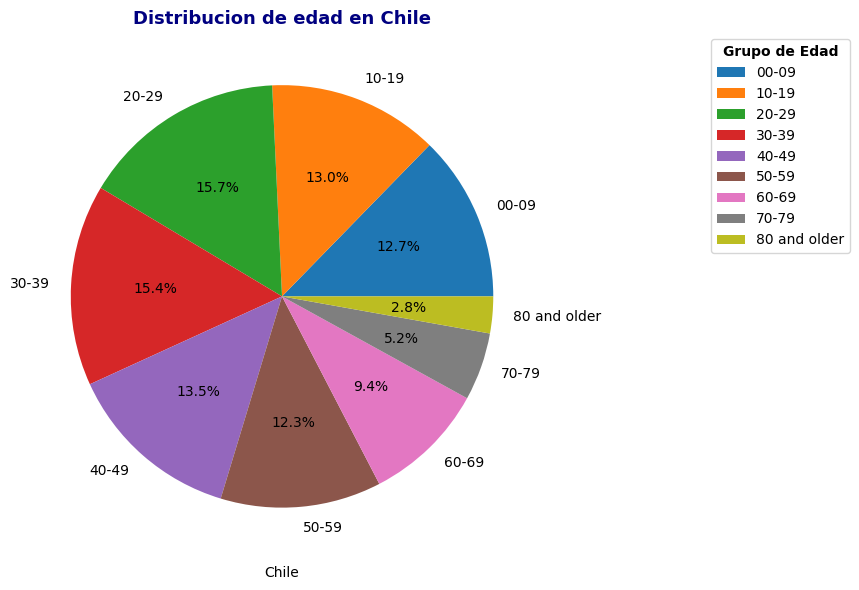

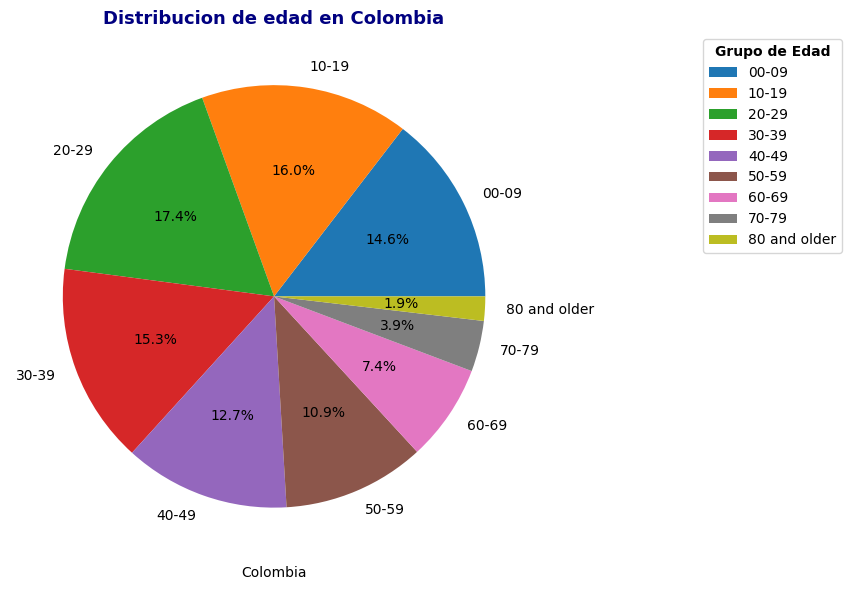

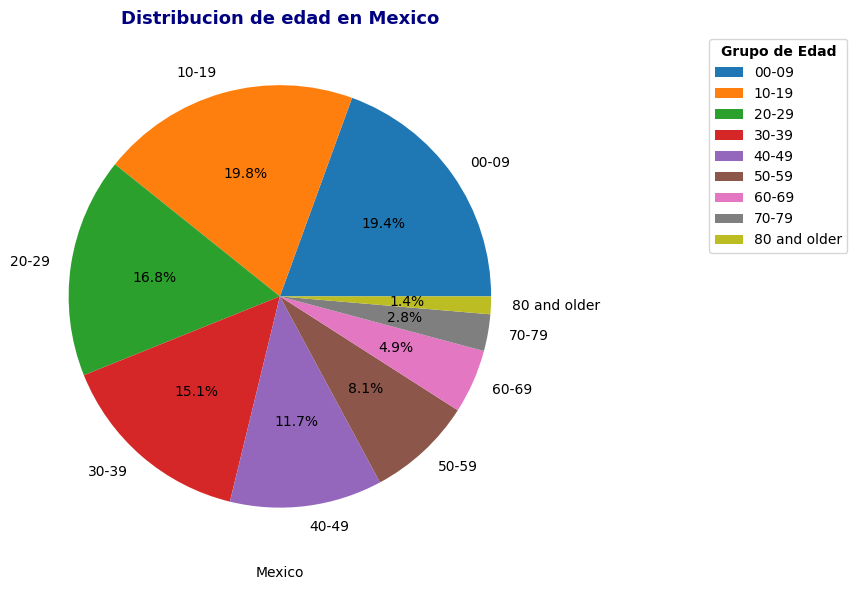

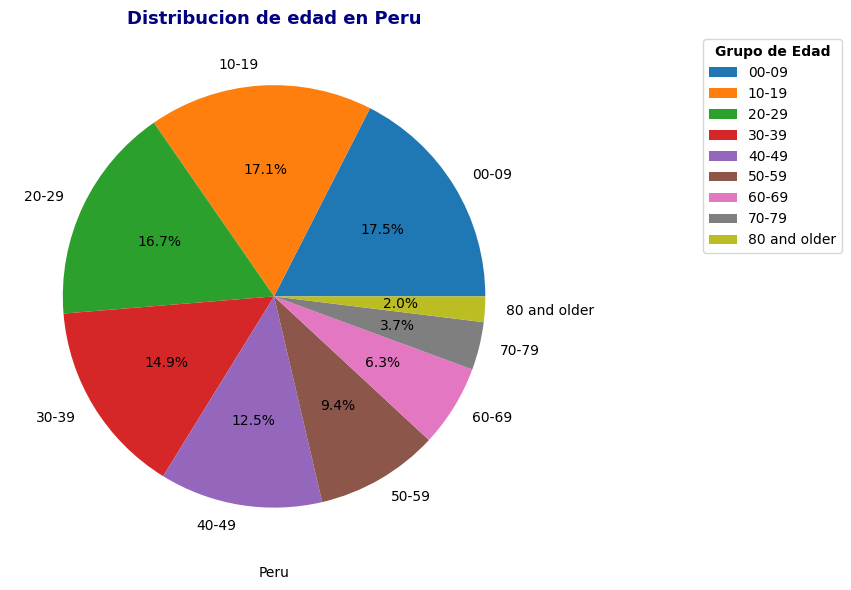

In [56]:
#importamos esta libreria para darle estilo al titulo de la leyenda
from matplotlib.font_manager import FontProperties

# calculamos el porcentaje de personas de población respecto a la poblacion total de cada pais por grupos de edad
df_datos_filtrados['edad_percentage'] = (df_datos_filtrados['population'] / df_datos_filtrados['population']) * 100

#en esta metodo tomamos en cuenta la variable edad_percentage la ordenamos de mayor a menor y tomamos el maximo para sacar el valor mas alto
high_countries = df_datos_filtrados.groupby('country_name')['edad_percentage'].max().sort_values(ascending=False).head(6).index

#creamos una lista con las columnas de los diferentes grupos de edad que hay
age_groups = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Calculamos el promedio de cada grupo de edad para los paises con mayor porcentaje de población verificando que el pais esta en el listado
age_distribution = df_datos_filtrados[
    df_datos_filtrados['country_name'].isin(high_countries)
].groupby('country_name')[age_groups].mean()

#aqui extraemos una lista de paises unicos
paises = age_distribution.index.unique()

#recorremos cadas pais en un ciclo for para generar un grafico de pastel por cada pais
for pais in paises:
    plt.figure(figsize=(12, 6))

    #generamos el primer  grafico de pastel donde se muestra la distribucion de edad por pais y es el adecuado para este tipo de analisis porque permite visualizar la proporción 
    # de cada grupo de edad 
    plt.pie(
        age_distribution.loc[pais].values,
        labels=['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80 and older'], #colocamos la etiquetas mas faciles de leer
        autopct='%1.1f%%'  # Mostramos el porcentaje en cada grupo de edades en formato con un decimal 
    )
    plt.xlabel(f'{pais}')
    plt.title(f'Distribucion de edad en {pais}', fontsize=13, fontweight='bold', color='navy')
    #colocamos el titulo de la leyenda en negrita
    bold_title = FontProperties(weight='bold')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad', title_fontproperties=bold_title)
    plt.tight_layout()
    plt.show()

##### • Funciones para medidas básicas de estadísticas para columnas de nuestro interes. 

In [57]:
# Funciones para mediana, varianza y rango
def calculate_median(column):
    return column.median()

def calculate_variance(column):
    return column.var()

def calculate_range(column):
    return column.max() - column.min()

# Aplicar las funciones a las columnas de interés
columns_of_interest = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed',
    'cumulative_deceased', 'cumulative_vaccine_doses_administered',
    'average_temperature_celsius', 'population_density',
    'population_male', 'population_female', 'gdp_usd', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate',
    'new_recovered', 'cumulative_recovered'
]

#creamos un diccionario para almacenar las estadisticas de cada columna
statistics = {}
for column in columns_of_interest:
    statistics[column] = {
        'Median': calculate_median(df_datos_filtrados[column]),
        'Variance': calculate_variance(df_datos_filtrados[column]),
        'Range': calculate_range(df_datos_filtrados[column]),
    }

#convertimos el diccionario a un DataFrame para una mejor visualización y trasponemos el dataframe para que las columnas sean las estadisticas y las filas las columnas de interes
statistics_df = pd.DataFrame(statistics).transpose()

#visualizamos las estadisticas de cada columna
statistics_df


Median      Variance  \
new_confirmed                          5.133000e+03  5.866312e+08   
new_deceased                           9.900000e+01  2.572955e+05   
cumulative_confirmed                   3.632144e+06  6.382784e+13   
cumulative_deceased                    1.396650e+05  3.343726e+10   
cumulative_vaccine_doses_administered  4.153706e+07  8.092732e+15   
average_temperature_celsius            2.158810e+01  3.654421e+01   
population_density                     2.573450e+01  2.835679e+02   
population_male                        2.225416e+07  1.101240e+15   
population_female                      2.324582e+07  1.189151e+15   
gdp_usd                                3.867331e+11  3.680675e+23   
smoking_prevalence                     1.395000e+01  1.145386e+02   
diabetes_prevalence                    8.000000e+00  6.647331e+00   
infant_mortality_rate                  1.105000e+01  5.007171e+00   
adult_male_mortality_rate              1.493510e+02  7.290079e+02   
adult_female_mortality_rate            8.214900e+01  1.392547e+02   
new_recovered                          0.000000e+00  5.274234e+08   
cumulative_recovered                   0.000000e+00  7.006030e+13   

                                              Range  
new_confirmed                          2.989810e+05  
new_deceased                           1.144700e+04  
cumulative_confirmed                   3.456786e+07  
cumulative_deceased                    6.852020e+05  
cumulative_vaccine_doses_administered  3.478685e+08  
average_temperature_celsius            3.570679e+01  
population_density                     4.981000e+01  
population_male                        9.546377e+07  
population_female                      9.952164e+07  
gdp_usd                                1.612910e+12  
smoking_prevalence                     3.300000e+01  
diabetes_prevalence                    7.600000e+00  
infant_mortality_rate                  6.600000e+00  
adult_male_mortality_rate              8.085900e+01  
adult_female_mortality_rate            3.678000e+01  
new_recovered                          3.140760e+05  
cumulative_recovered                   3.370623e+07

In [ ]:
#guardamos el nuevo dataframe con las nuevas columnas agregadas en un archivo csv para su posterior analisis en power bi
df_datos_filtrados.to_csv('DatosImportar.csv', index=False)